# SK 유동인구데이터 22시 - 02시 / 03시 - 08시 Diff 보기

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
from matplotlib import rc
from IPython.core.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# display 설정
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
# 한글 폰트 설정
path= 'c:/Windows/Fonts/malgun.ttf'
font_name= font_manager.FontProperties(fname= path).get_name()
plt.rcParams['font.family']= font_name

# 마이너스 깨짐 설정
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

In [4]:
path= 'c:/Users/soohan/bigcontest/dataset/BIGCON_DATA_ver1.2'

with open(path+'/CJ_DATA.bin', 'rb') as f:
    cj = pickle.load(f)

with open(path+'/GS_DATA.bin', 'rb') as f:
    gs = pickle.load(f)
    
with open(path+'/SH_DATA.bin', 'rb') as f:
    sh = pickle.load(f)
    
with open(path+'/SK_DATA.bin', 'rb') as f:
    sk = pickle.load(f)
    
with open(path+'/WS_DATA.bin', 'rb') as f:
    ws = pickle.load(f)

In [5]:
# cj data
cj_data= cj['CJ_DATA']

# gs data
gs_total_data= gs['GS_TOTAL']
gs_category_data= gs['GS_CATEGORY']
gs_dong_data= gs['GS_DONG']

# sh data
sh_resident_data= sh['SH_RESIDENT']
sh_foreign_data= sh['SH_FOREIGN']

# sk data
sk_age_data= sk['SK_AGE']
sk_time_data= sk['SK_TIME']

# ws data
ws_mention_data= ws['WS_MENTION']
ws_sentiment_data= ws['WS_SENTIMENT']
ws_topic_data= ws['WS_TOPIC']

In [18]:
sk_2019 = sk_time_data.query('(YEAR == 2019)')
sk_2020 = sk_time_data.query('(YEAR == 2020)')

sk_list = sk_time_data.iloc[:,[6,7,8,9,10,11,12,13,14,-4,-5]].columns

In [21]:
def change_dong_name(HDONG_NM, HDONG_NM_new,df):
    for i in range(len(HDONG_NM)):
        ad = HDONG_NM[i]
        ad_n = HDONG_NM_new[i]
        for a in ad:
            df['DONG_NM'] = df['DONG_NM'].replace(a, ad_n)
    return df

In [22]:
HDONG_NM = [['고산1동', '고산2동', '고산3동'], ['두산동'], ['만촌1동', '만촌2동', '만촌3동'], ['범물1동', '범물2동'],
      ['범어1동', '범어2동', '범어3동', '범어4동'], ['수성1가동', '수성2.3가동', '수성4가동'], ['중동'],
      ['지산1동', '지산2동'], ['황금1동', '황금2동'], ['남산1동', '남산2동', '남산3동', '남산4동'], ['동인동'], ['삼덕동'],
      ['성내1동', '성내2동', '성내3동'], ['공릉1동', '공릉2동'], ['상계10동', '상계8동', '상계1동', '상계2동',
      '상계3.4동', '상계5동', '상계6.7동', '상계9동'], ['월계1동', '월계2동', '월계3동'], ['중계1동',
      '중계2.3동', '중계4동', '중계본동'], ['하계1동', '하계2동'], ['광희동'], ['다산동'], ['동화동'],
      ['명동'], ['소공동'], ['신당5동'], ['신당동'], ['약수동'], ['을지로동'], ['장충동'], ['중림동'], ['청구동'],
      ['필동'], ['황학동'], ['회현동'], ['대신동'], ['대봉1동', '대봉2동'], ['상동'], ['파동']]
HDONG_NM_new = ['고산동','두산동','만촌동', '범물동', '범어동', '수성동', '중동', '지산동', '황금동', '남산동', '동인동', 
            '삼덕동', '성내동', '공릉동', '상계동', '월계동', '중계동', '하계동', '광희동', '다산동', '동화동', '명동', 
            '소공동', '신당5동', '신당동', '약수동', '을지로동', '장충동', '중림동', '청구동', '필동', '황학동', '회현동', '대신동', '대봉동', '상동', '파동']

sk_2019 = change_dong_name(HDONG_NM, HDONG_NM_new,sk_2019 )
sk_2020 = change_dong_name(HDONG_NM, HDONG_NM_new,sk_2020 )

C:\Users\soohan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
# 2019년 서울/대구 분할
sk_2019_s = sk_2019.query('(SI_CODE == "11")')
sk_2019_d = sk_2019.query('(SI_CODE == "27")')
# 2020년 서울/대구 분할
sk_2020_s = sk_2020.query('(SI_CODE == "11")')
sk_2020_d = sk_2020.query('(SI_CODE == "27")')

In [37]:
def processing_plot(sk_df, year):
    dong_list = sk_df['DONG_NM'].unique()
    for dname in dong_list:
        sk_dong = sk_df.query("DONG_NM == @dname")
        sk_22_02 = pd.DataFrame({'TMST_22_02' : sk_dong.groupby('DATE')[sk_list[[0,1,2,-1,-2]]].sum().sum(axis=1)})
        sk_03_08 = pd.DataFrame({'TMST_03_08' : sk_dong.groupby('DATE')[sk_list[3:-2]].sum().sum(axis=1)})
        sk_dong_popul = pd.merge(sk_22_02, sk_03_08, left_index=True, right_index=True, how='left')
        sk_dong_popul = sk_dong_popul.reset_index()
        
        sk_dong_popul['TMST_22_02_diff'] = sk_dong_popul['TMST_22_02'] - sk_dong_popul['TMST_22_02'].shift(7)
        sk_dong_popul['TMST_03_08_diff'] = sk_dong_popul['TMST_03_08'] - sk_dong_popul['TMST_03_08'].shift(7)

        plt.figure(figsize=(30, 6))
        plt.subplot(1,2,1)
        plt.stem(sk_dong_popul['DATE'], sk_dong_popul['TMST_22_02_diff'],use_line_collection=True)
        plt.title(year+dname+' 22~02')
        plt.grid(axis ='x')
        plt.subplot(1,2,2)
        plt.stem(sk_dong_popul['DATE'], sk_dong_popul['TMST_03_08_diff'],use_line_collection=True)
        plt.title(year+dname+' 03~08')
        plt.grid(axis ='x')
        plt.show()

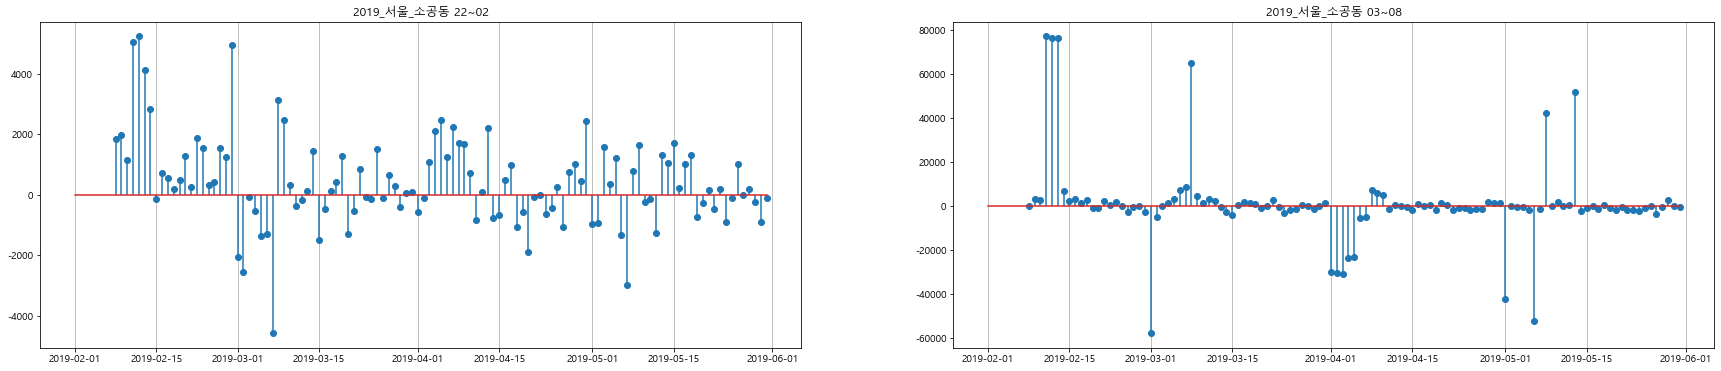

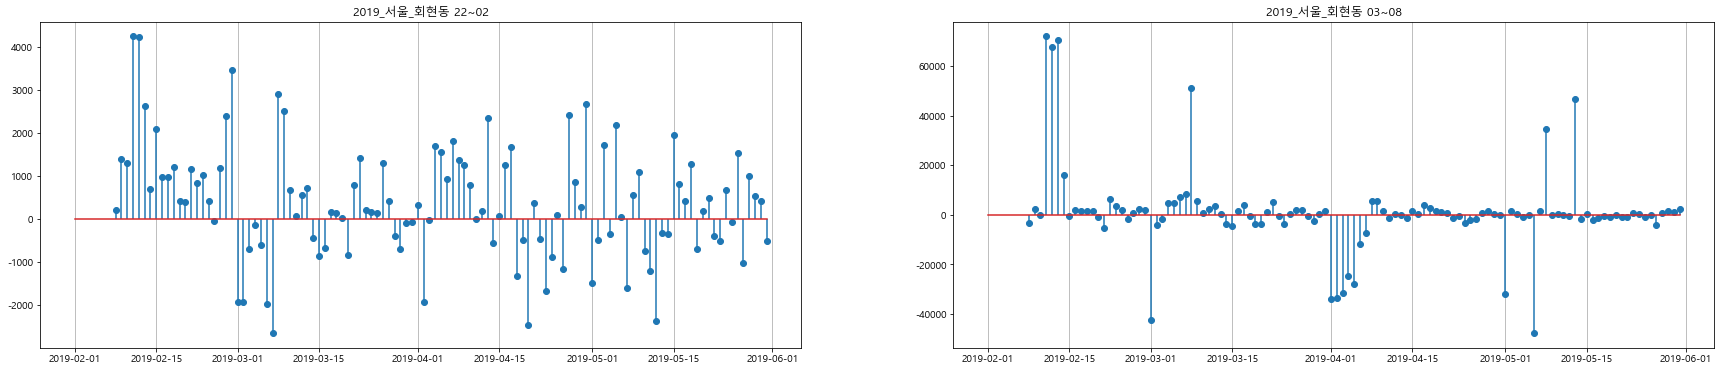

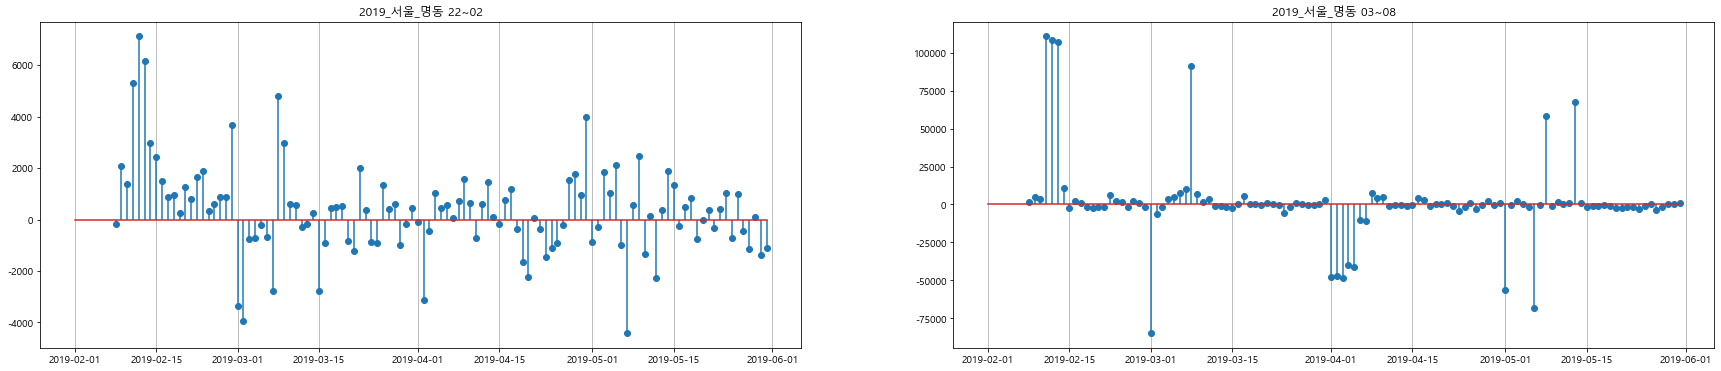

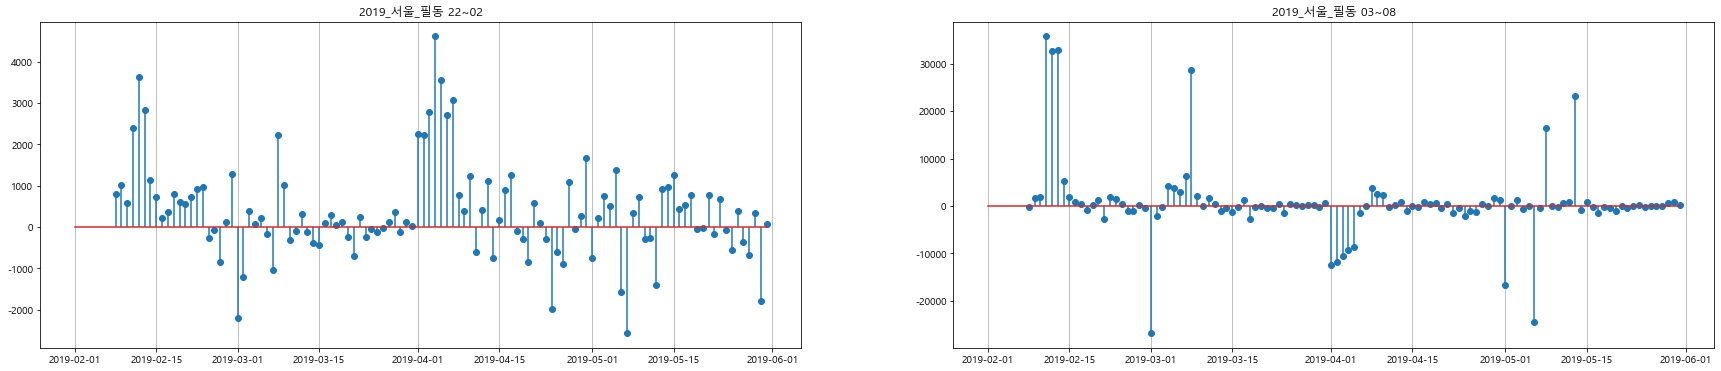

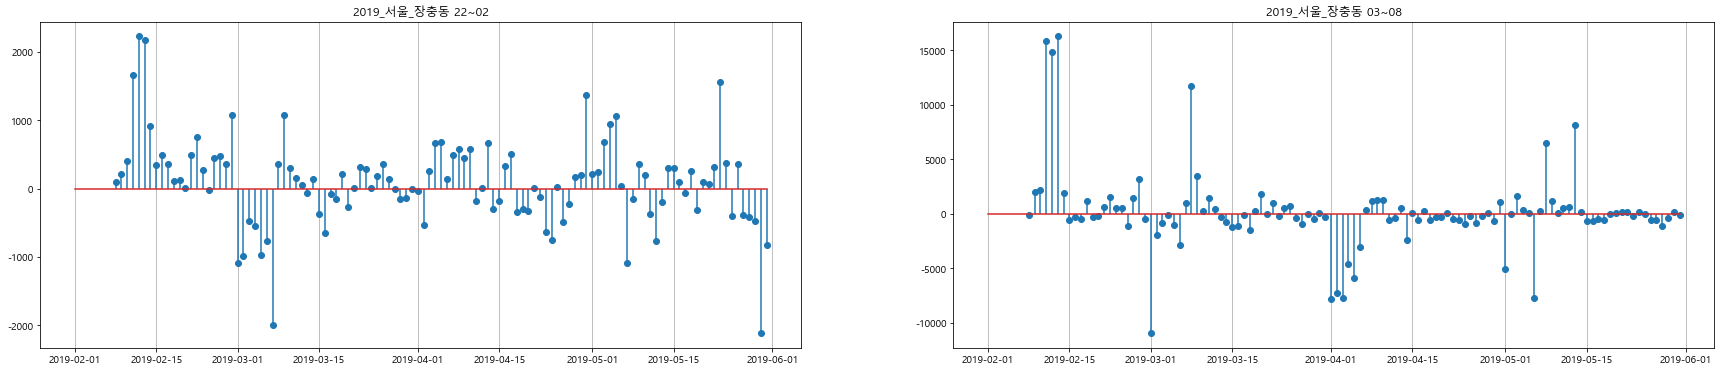

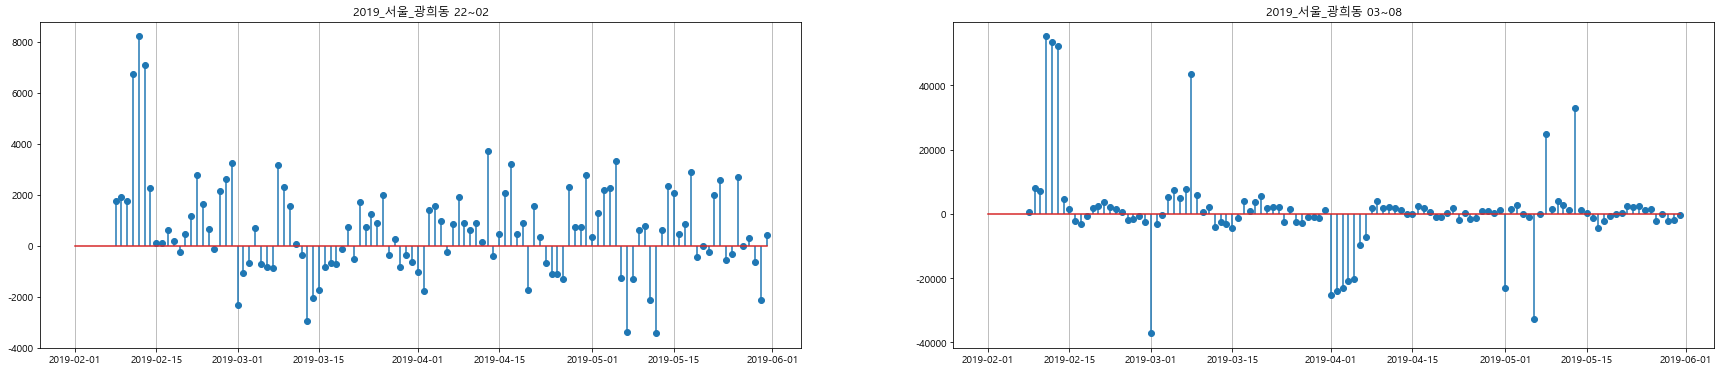

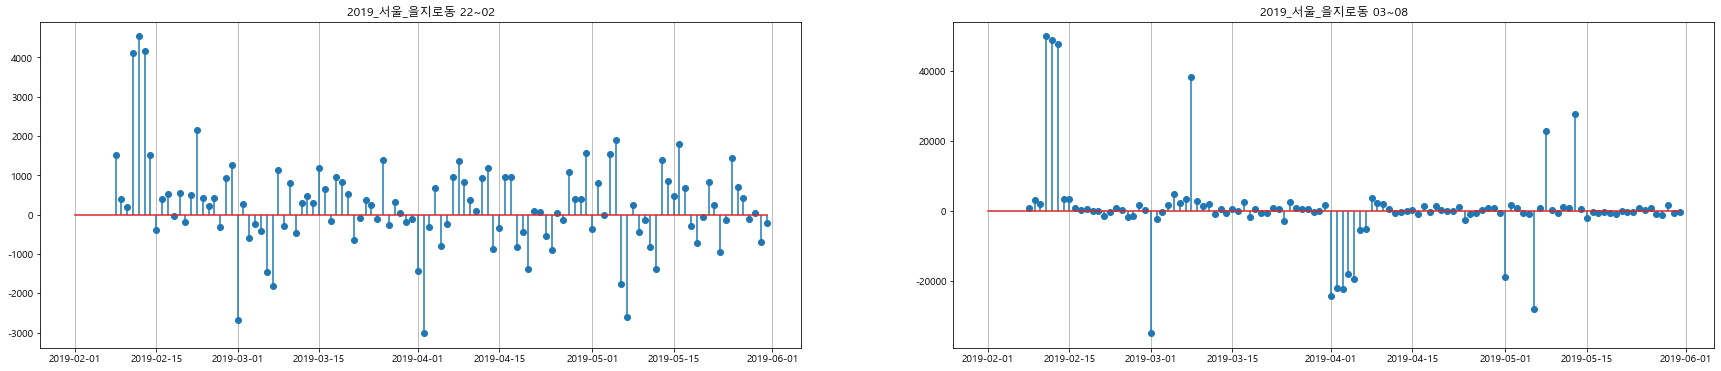

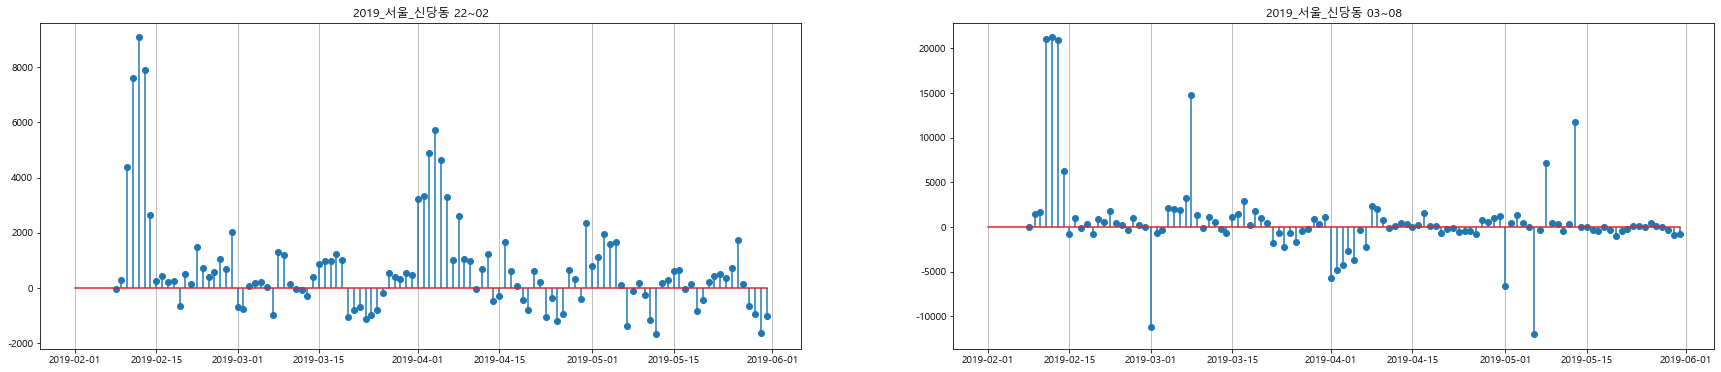

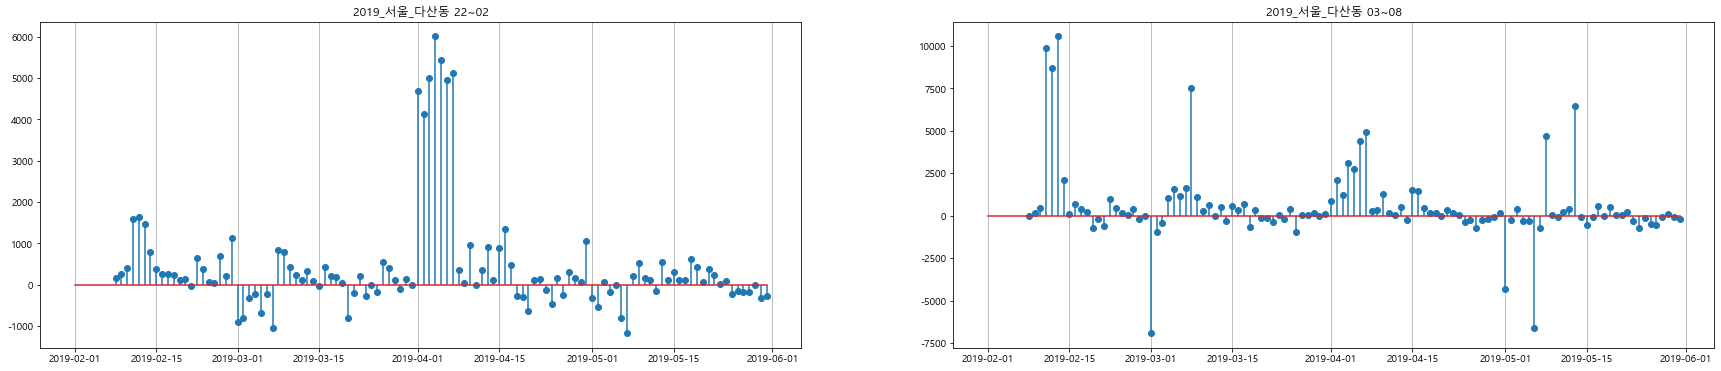

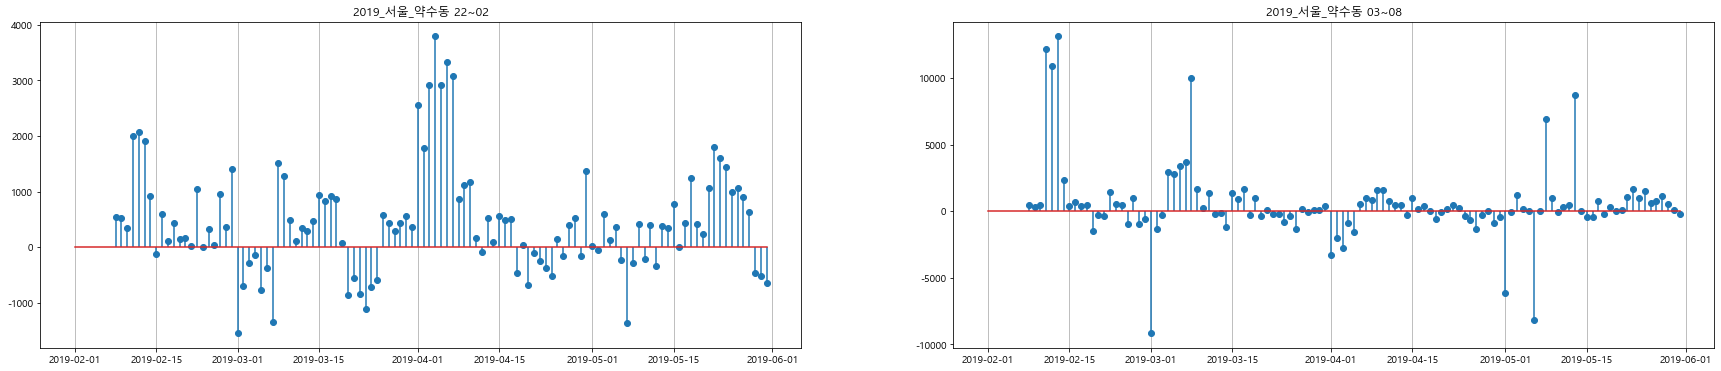

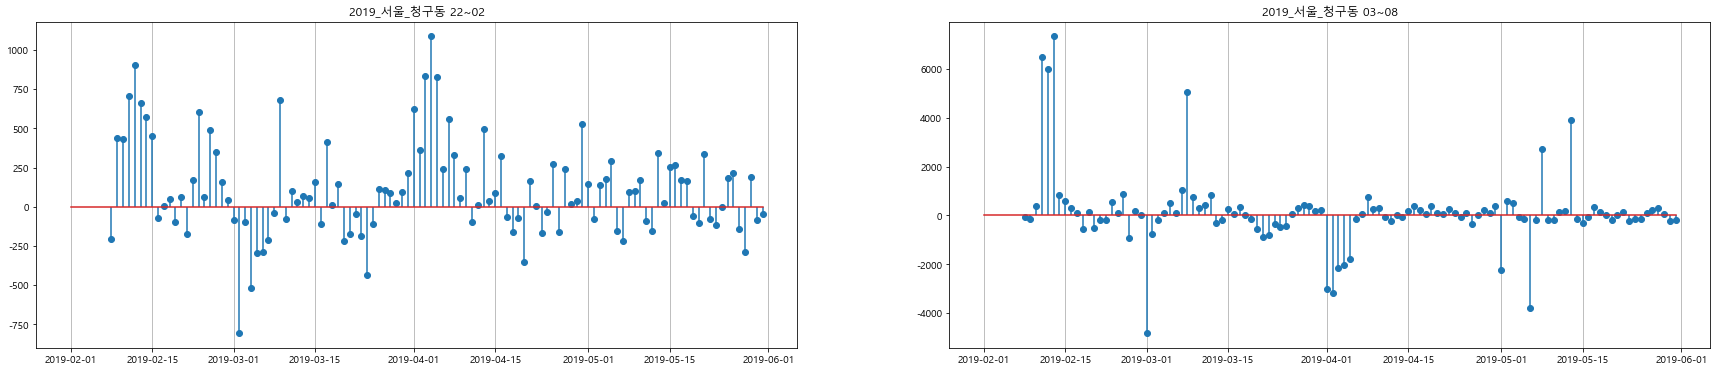

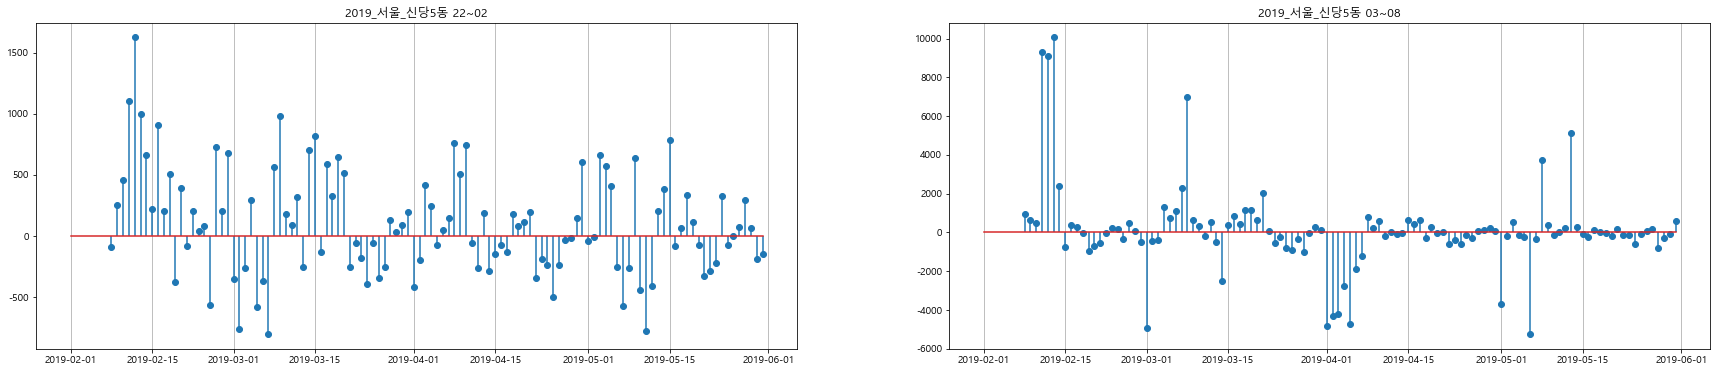

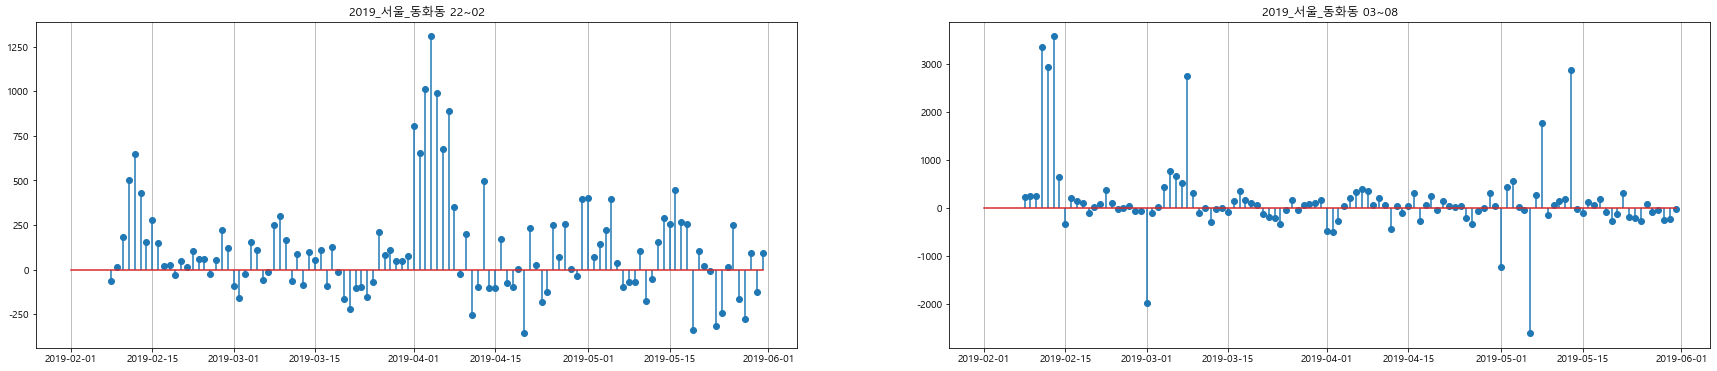

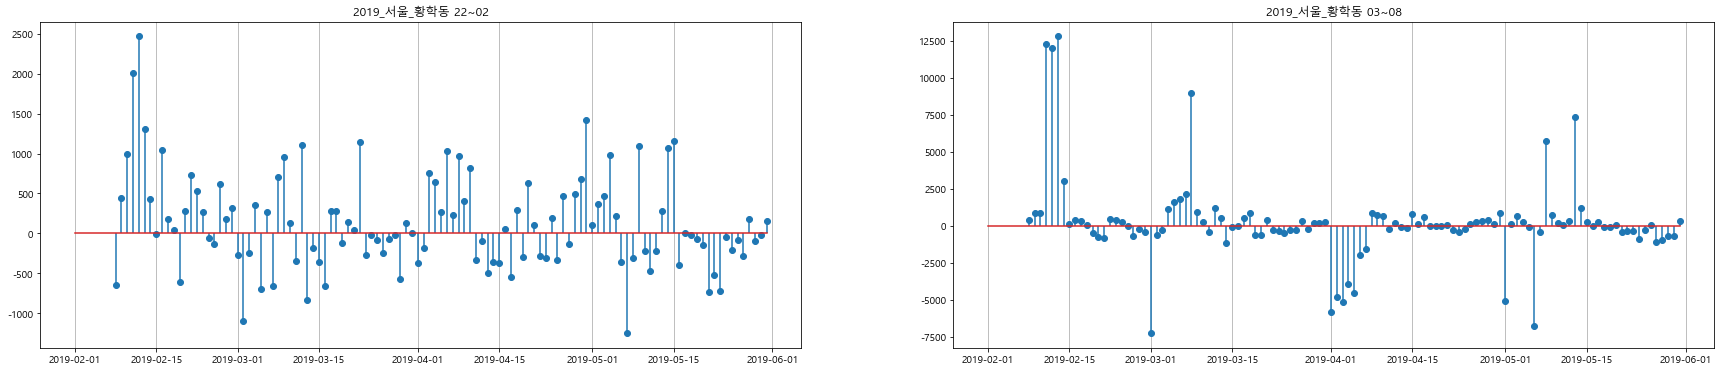

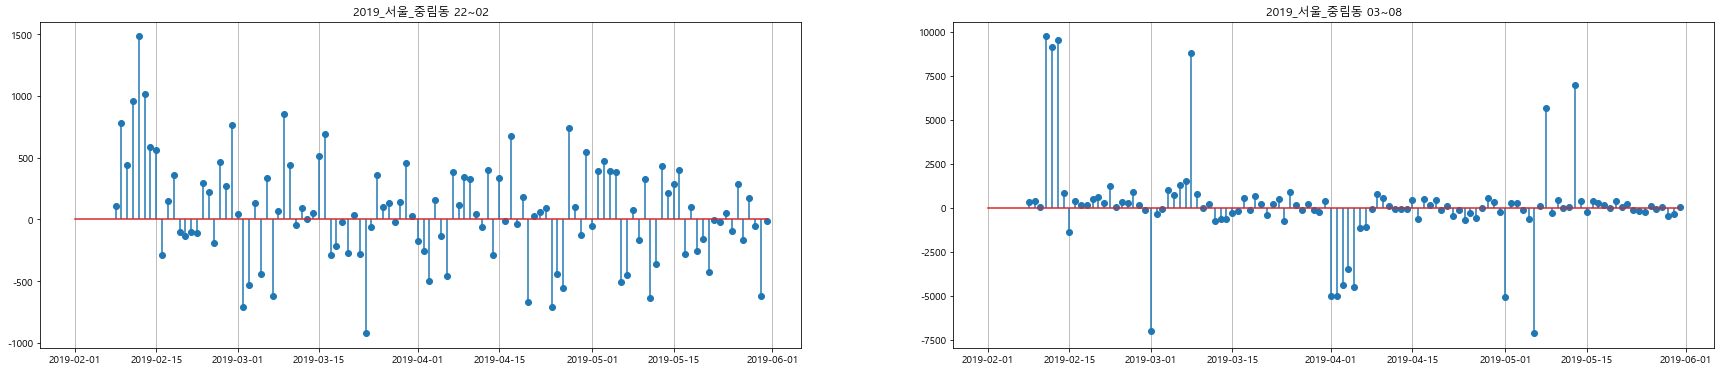

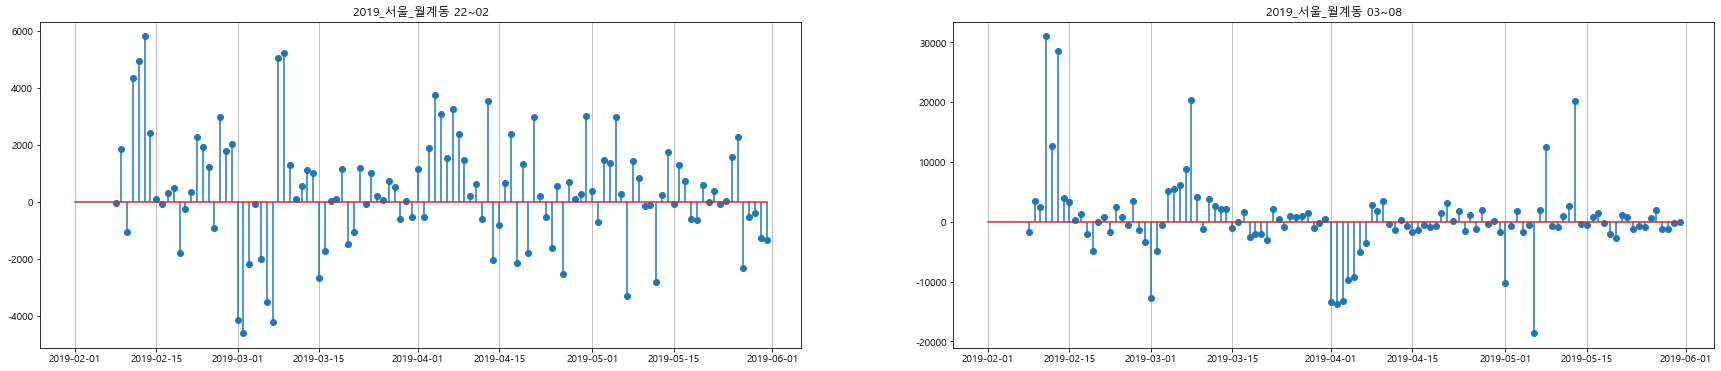

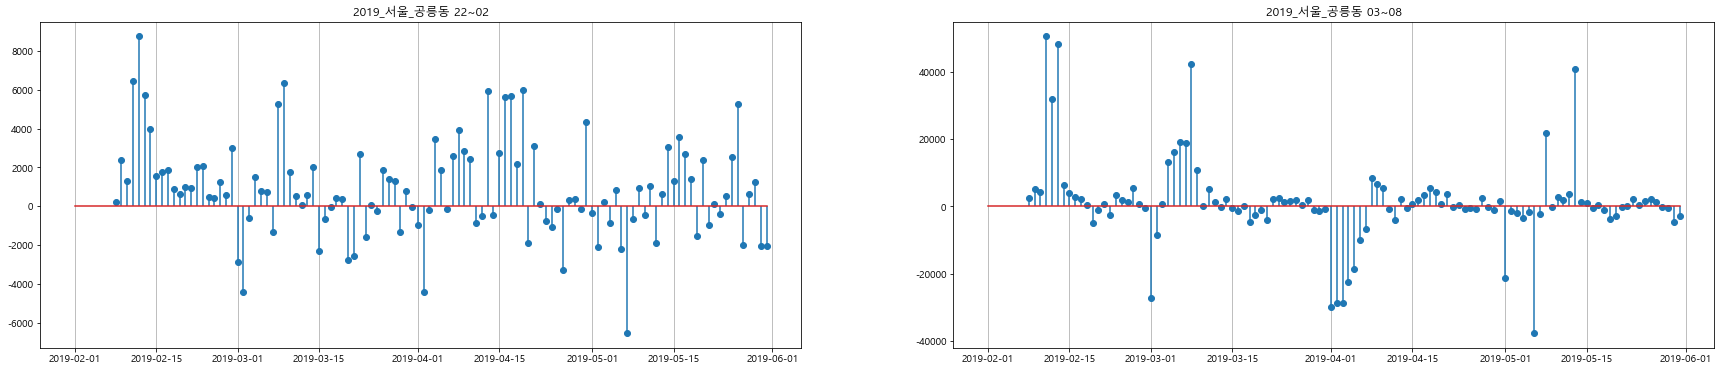

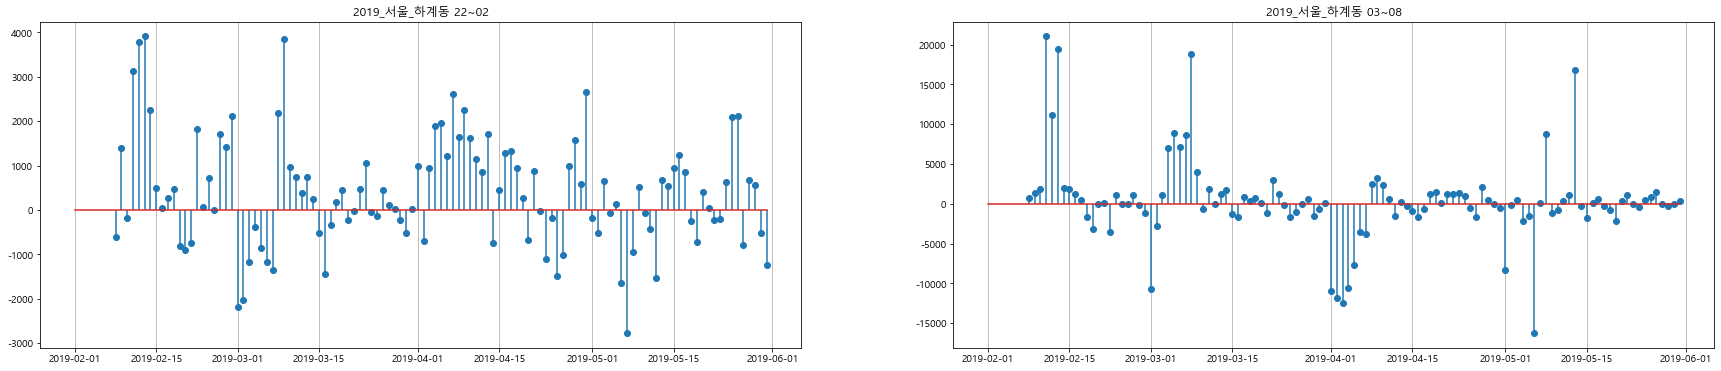

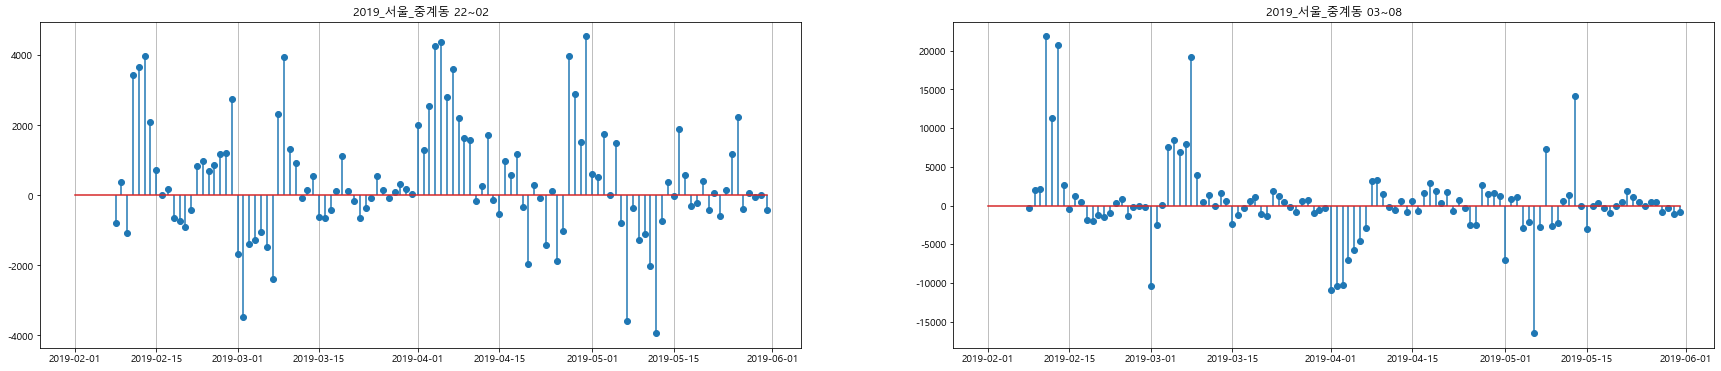

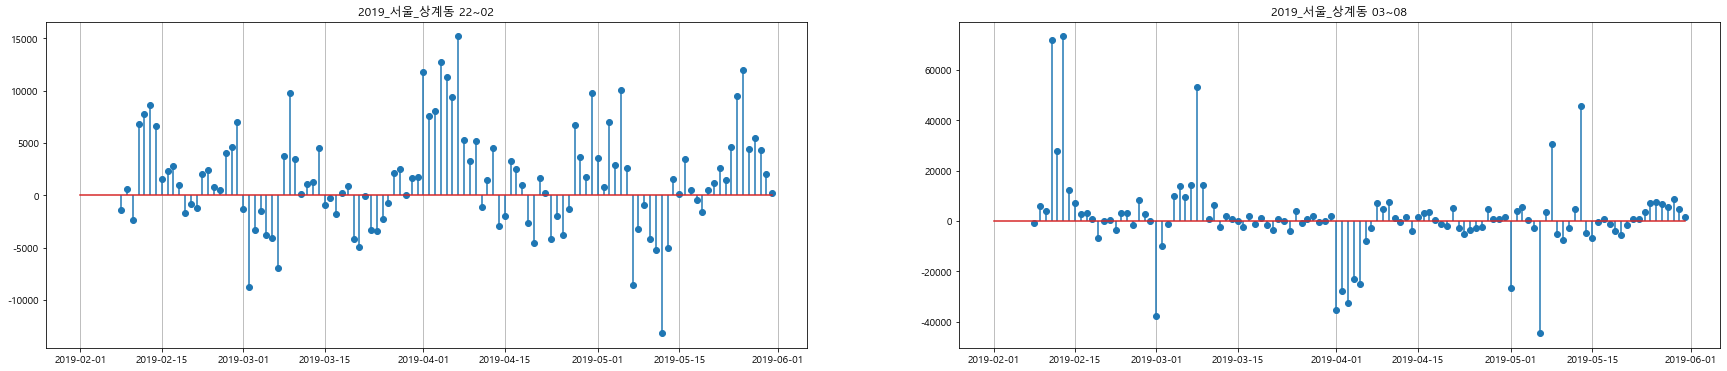

In [38]:
processing_plot(sk_2019_s,'2019_서울_')

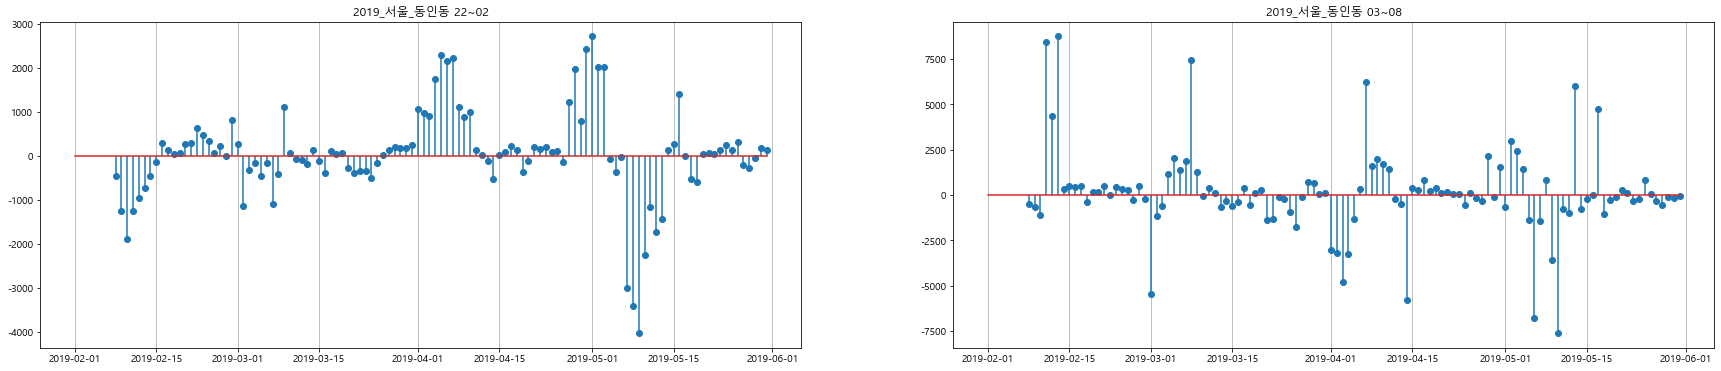

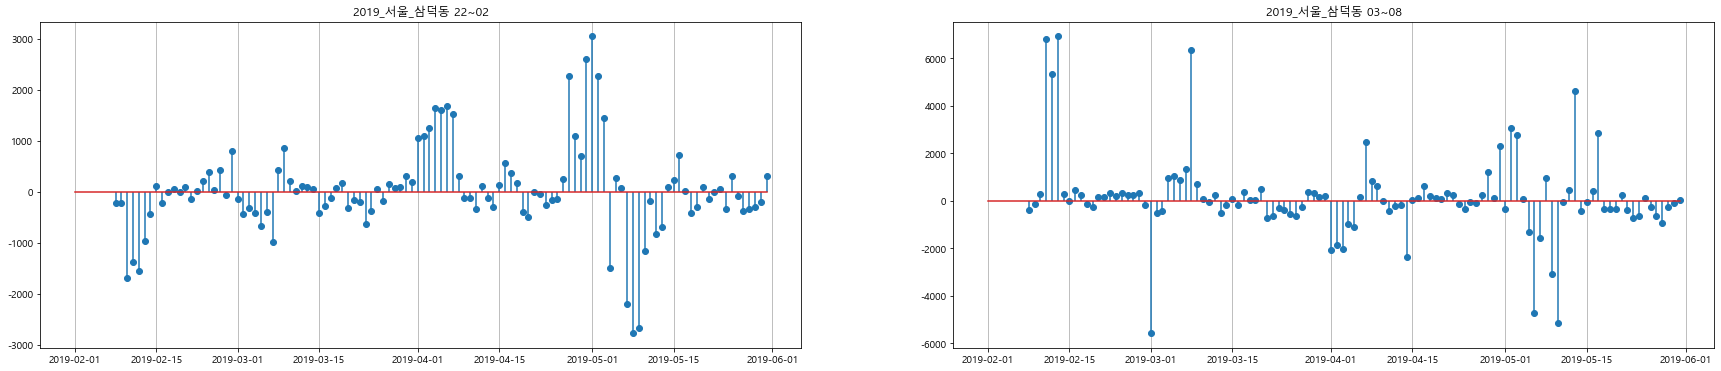

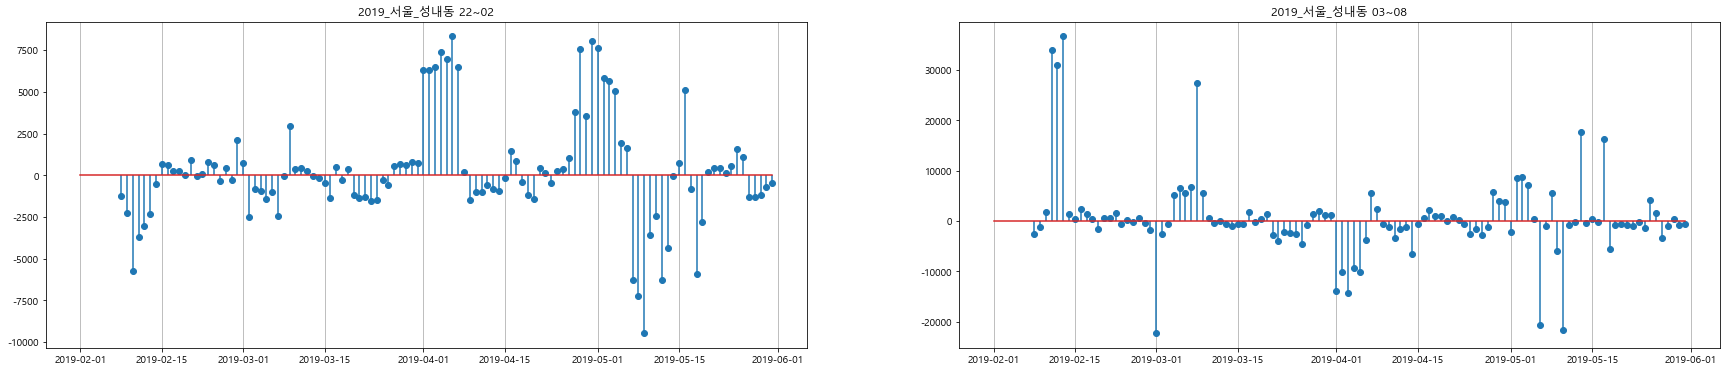

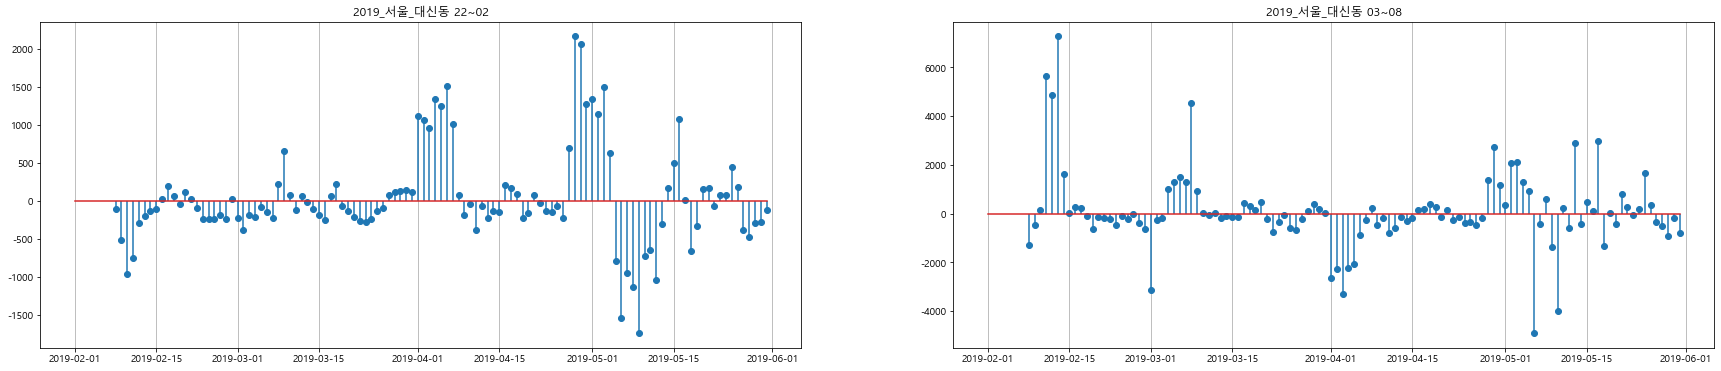

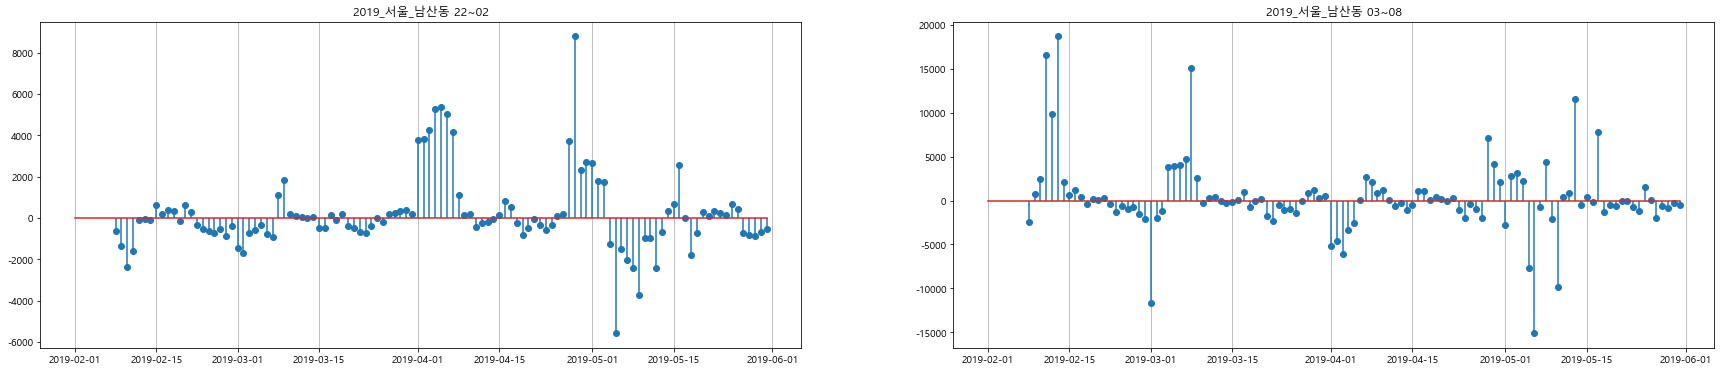

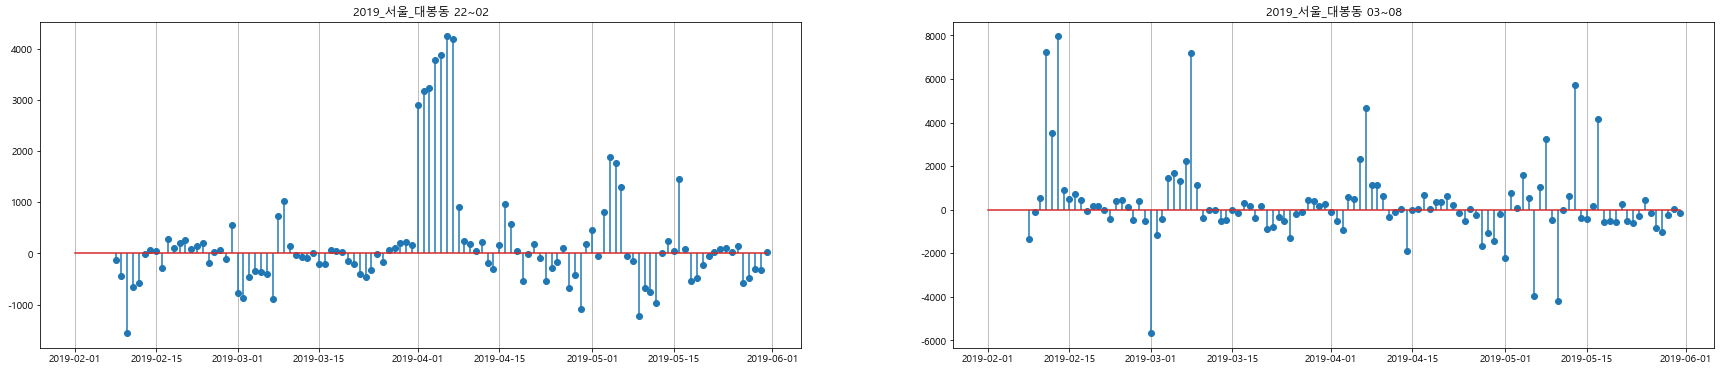

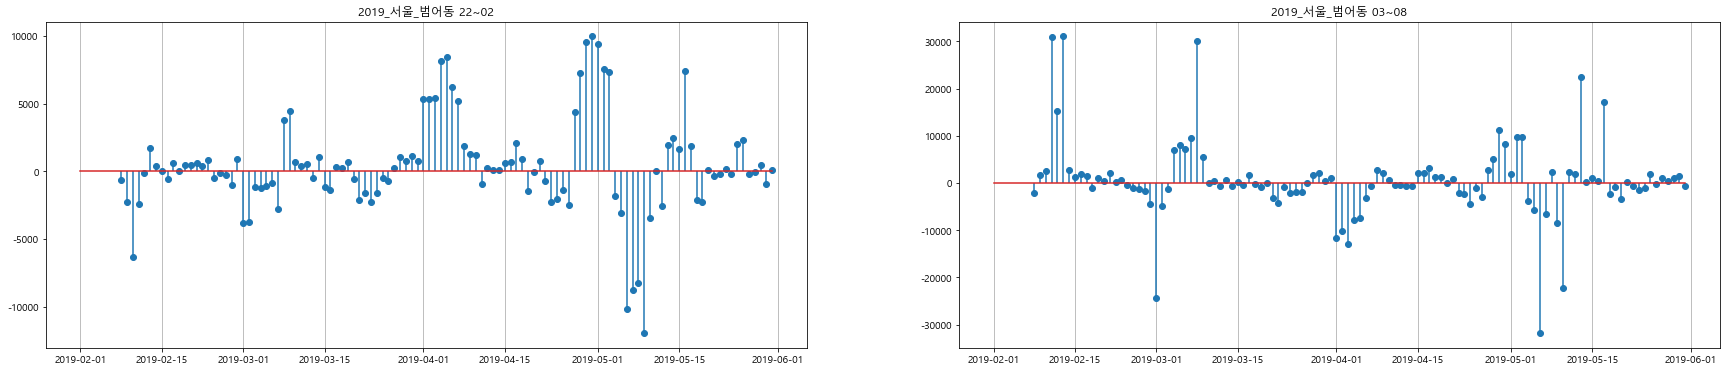

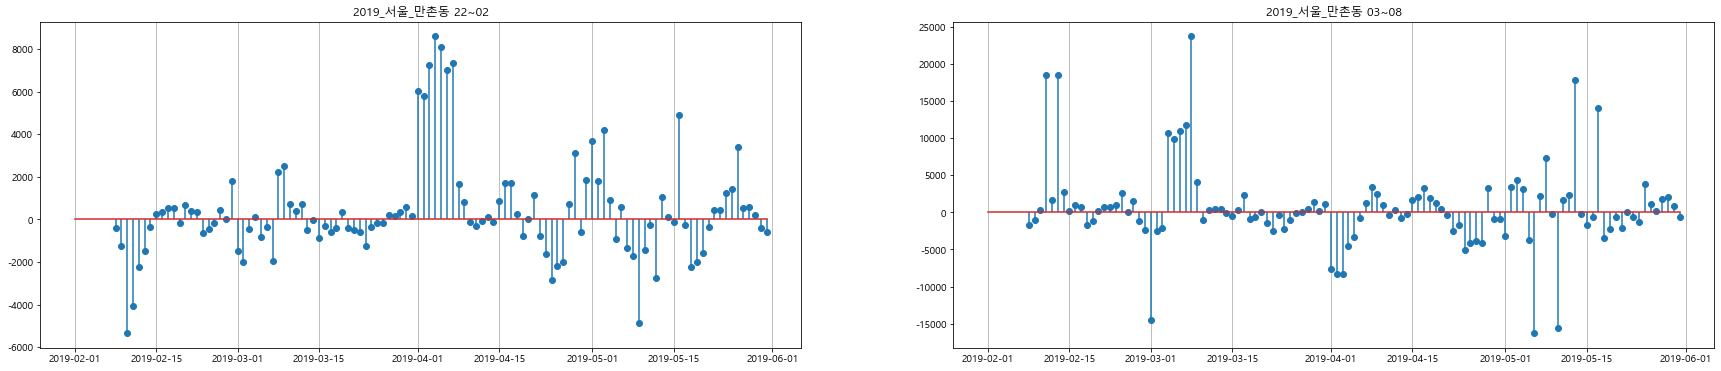

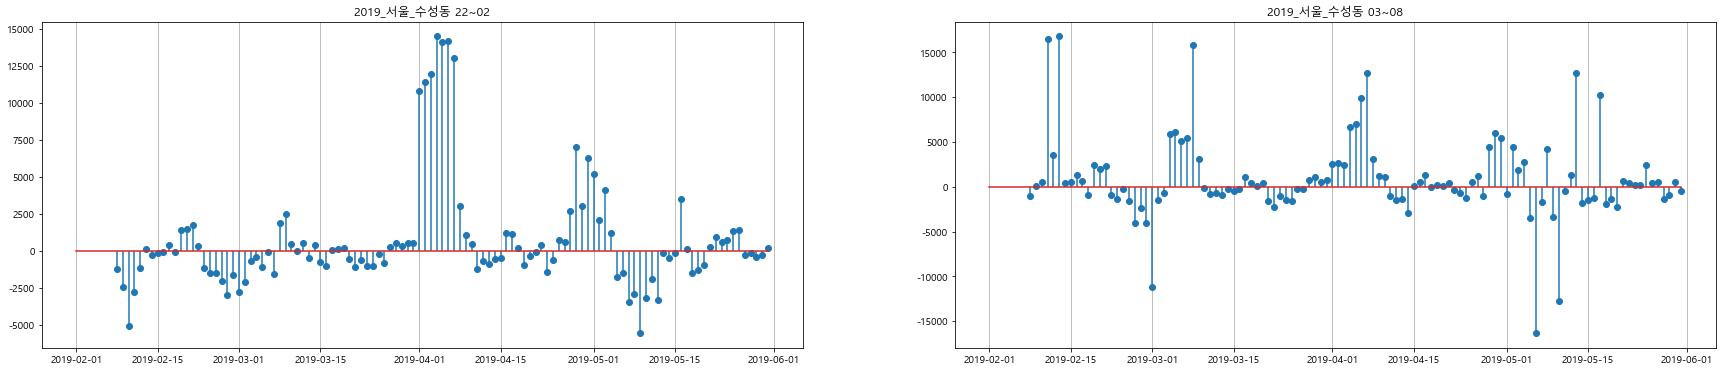

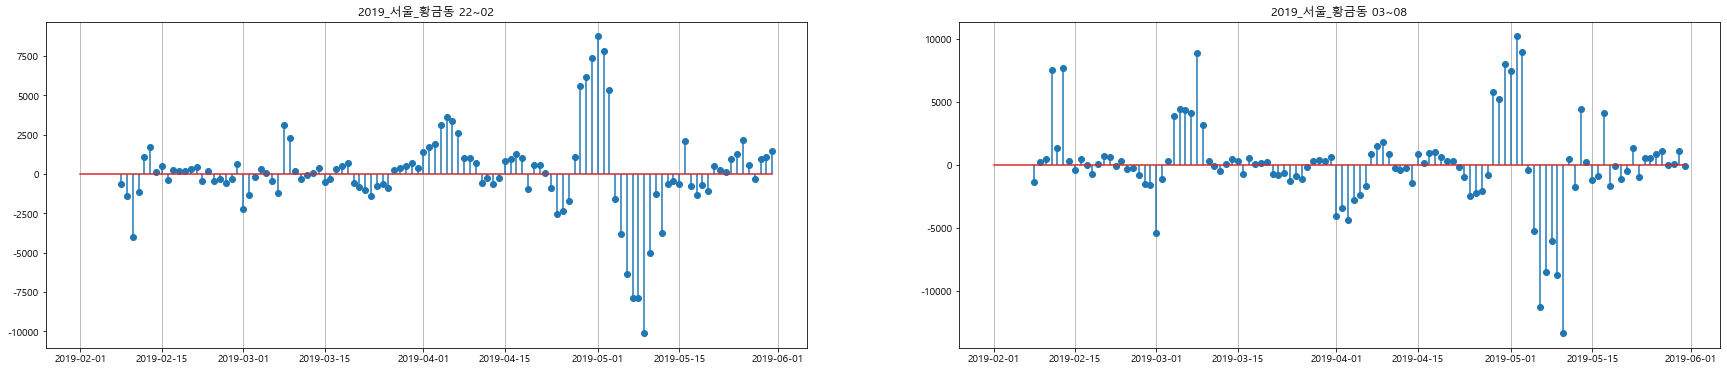

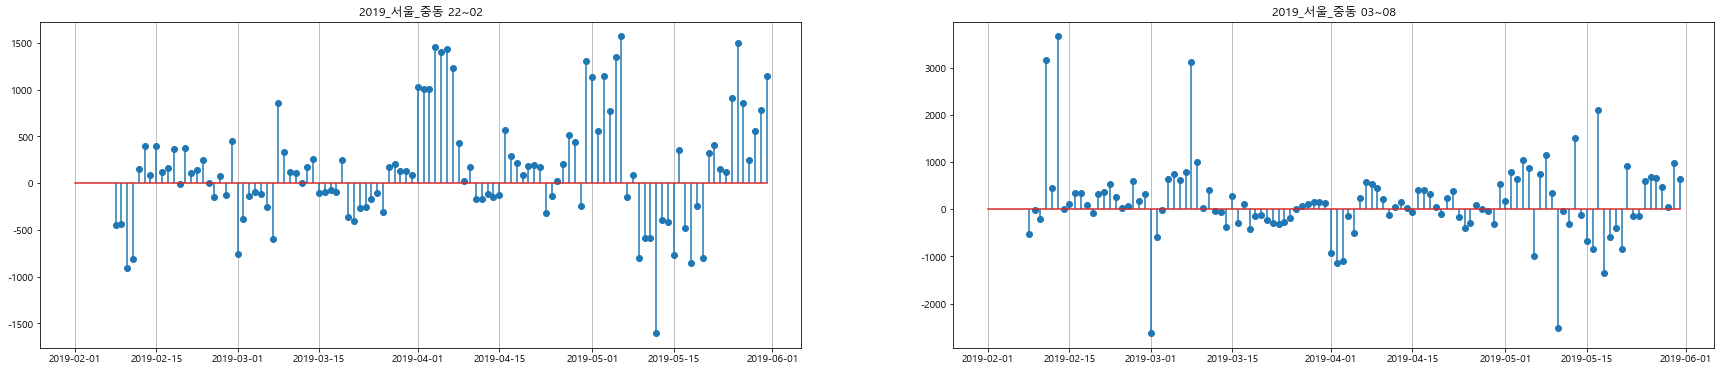

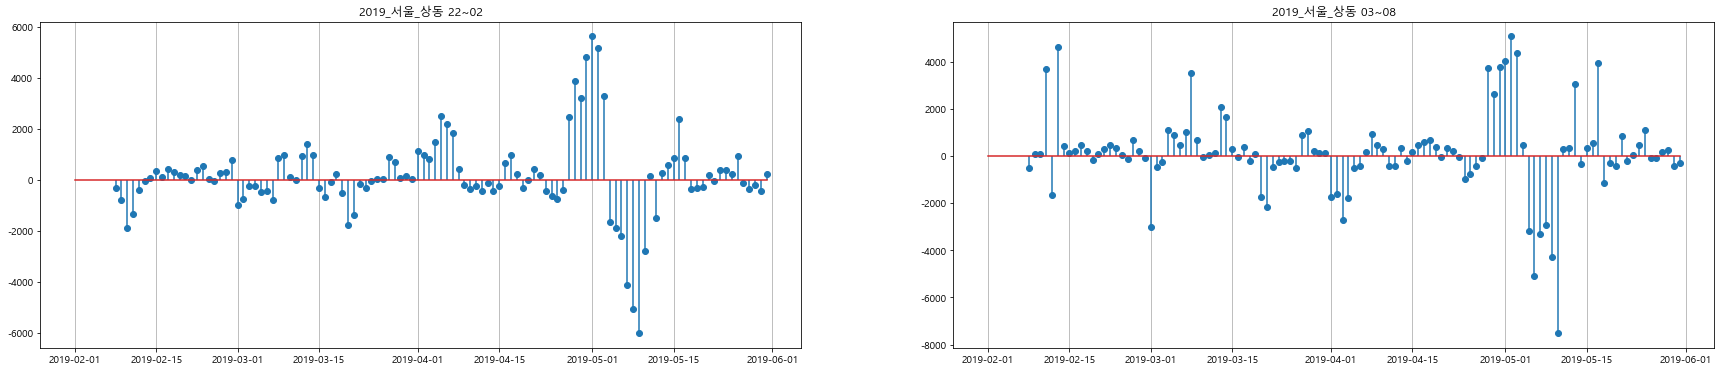

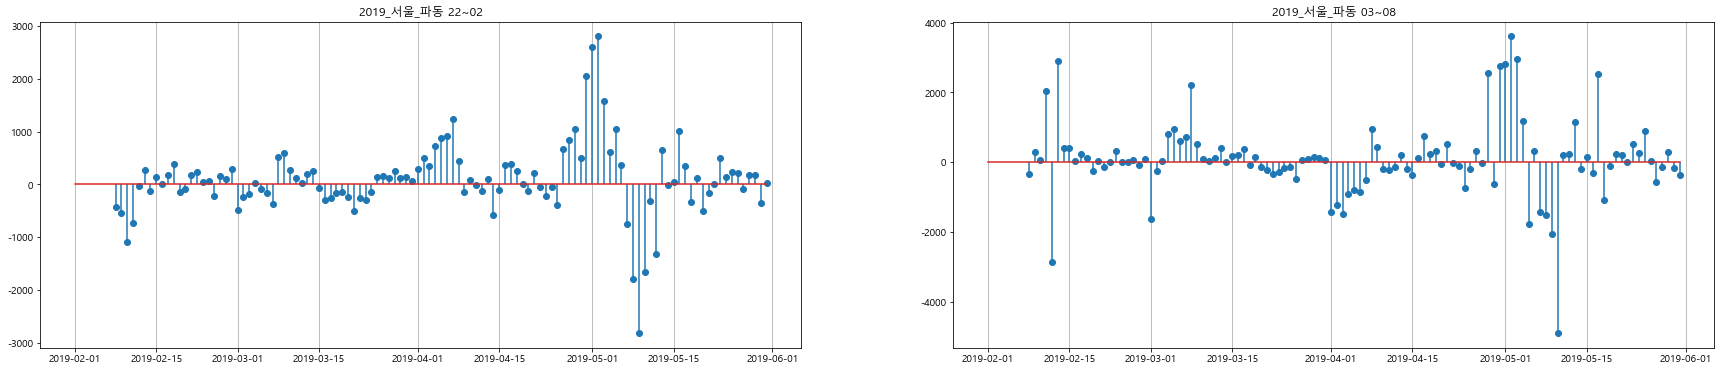

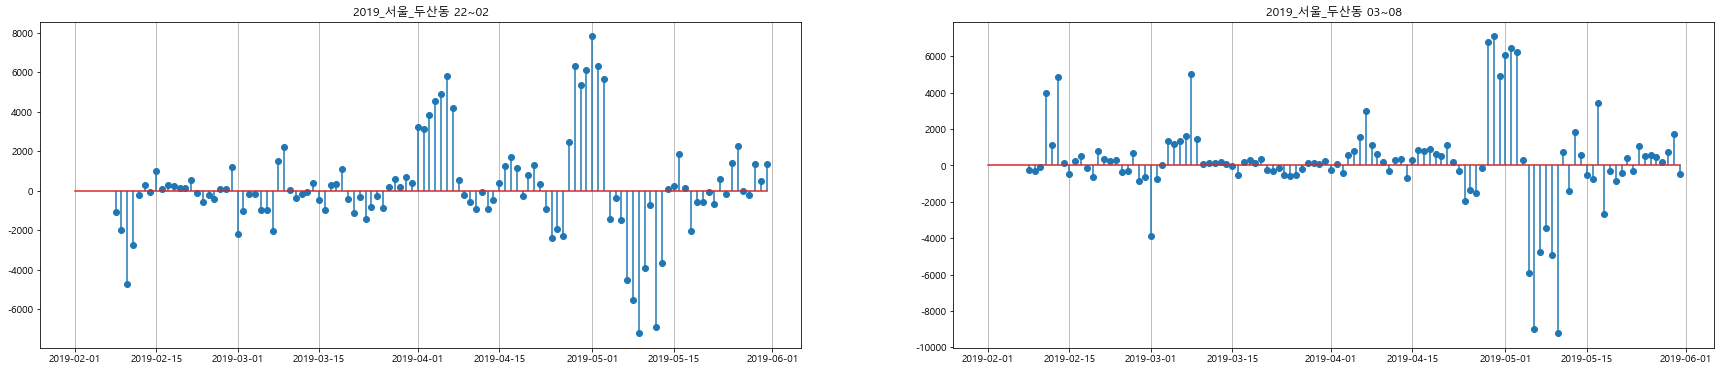

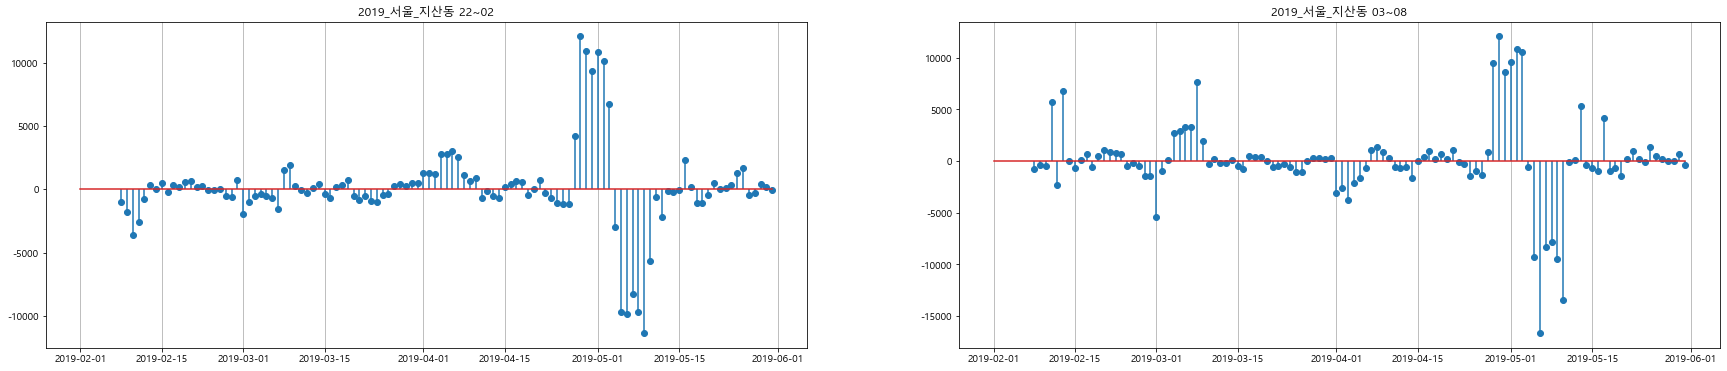

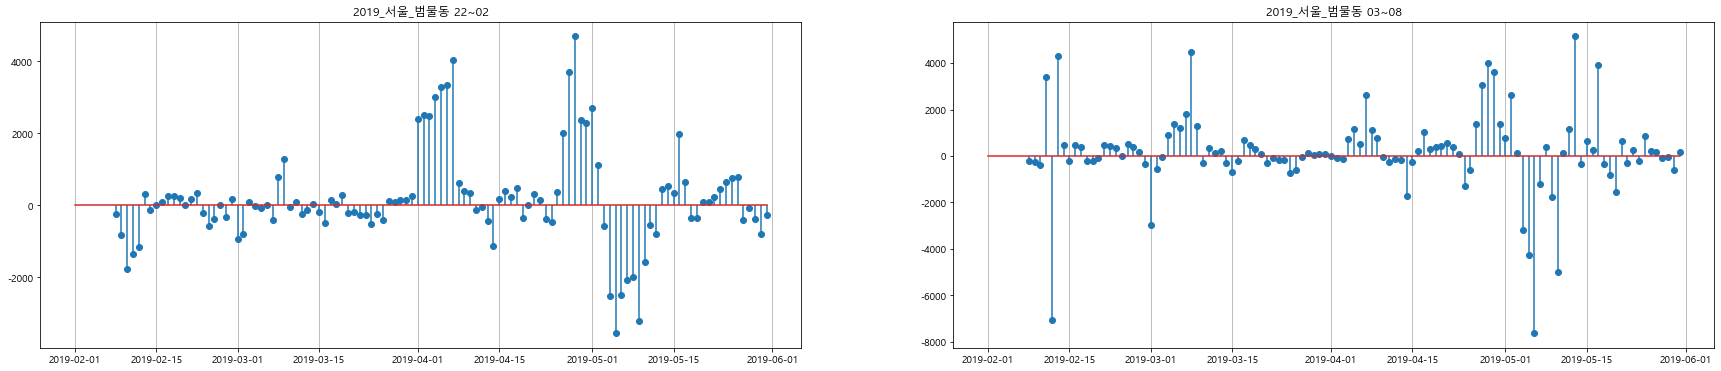

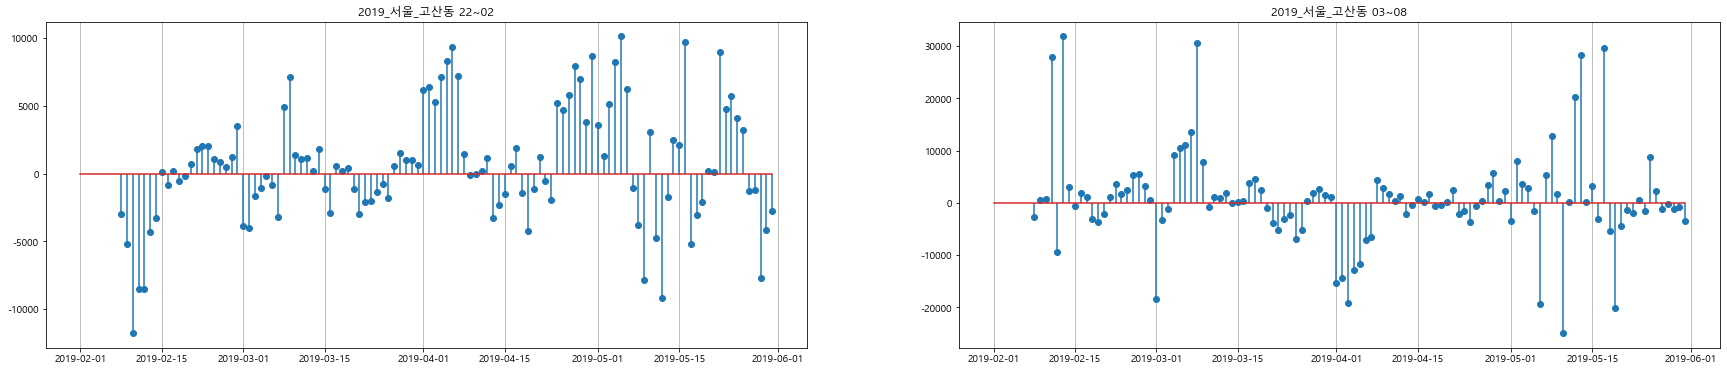

In [39]:
processing_plot(sk_2019_d,'2019_대구_')

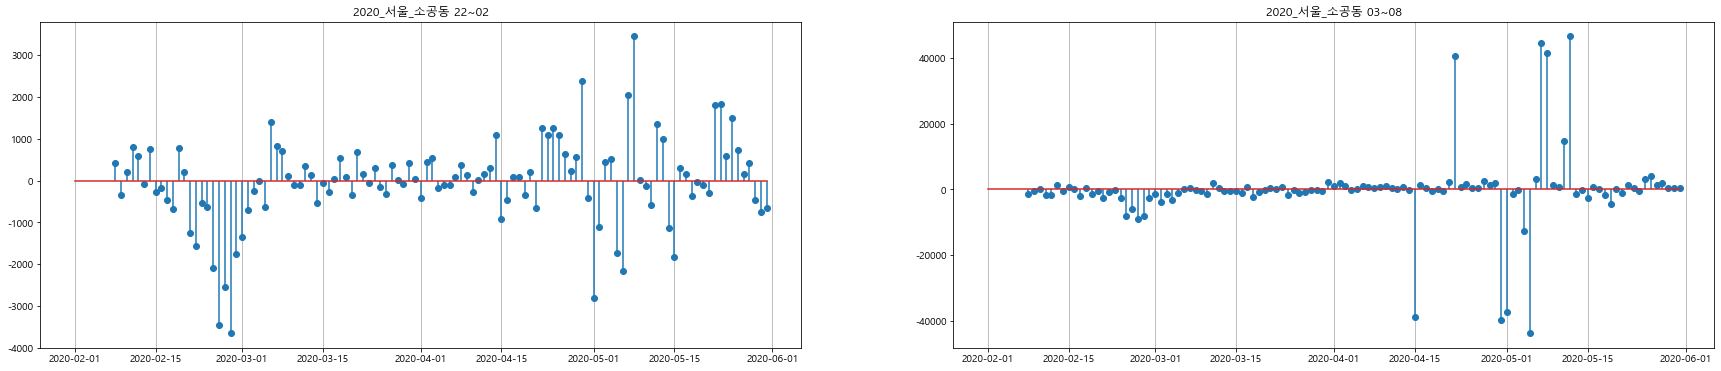

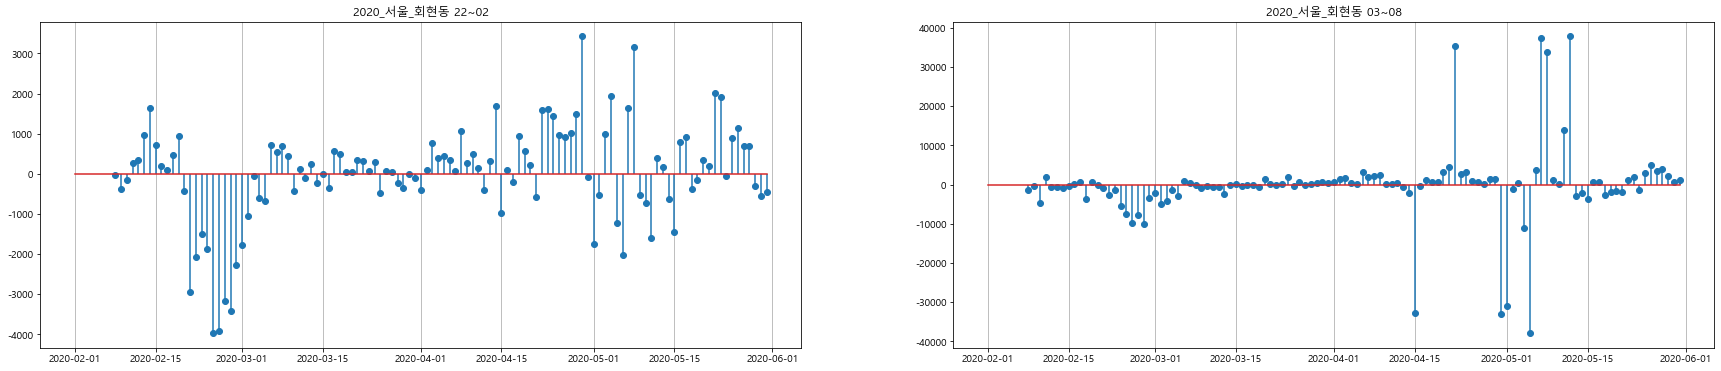

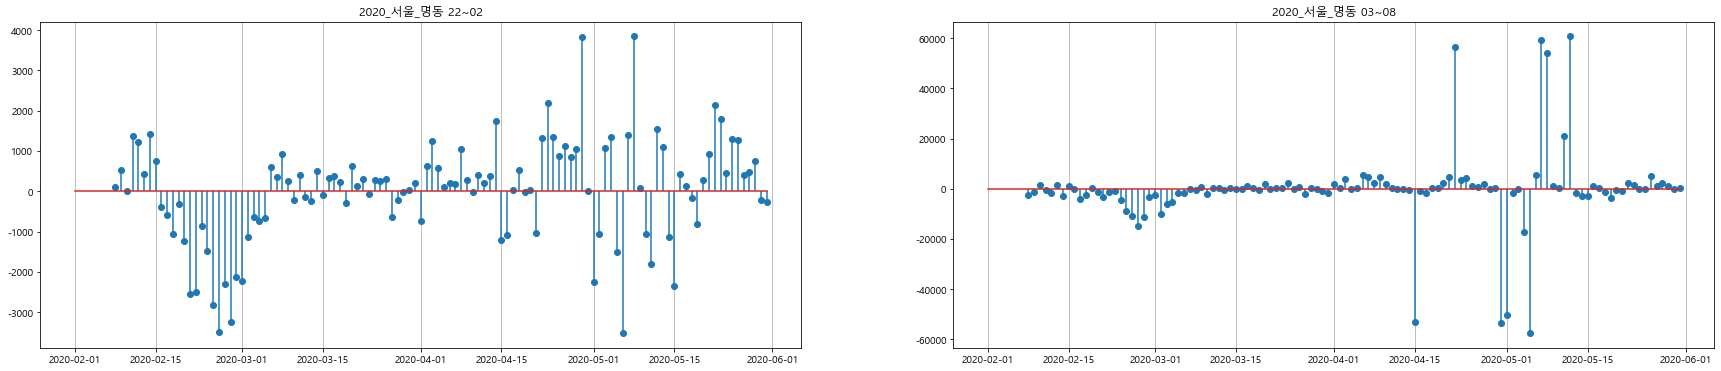

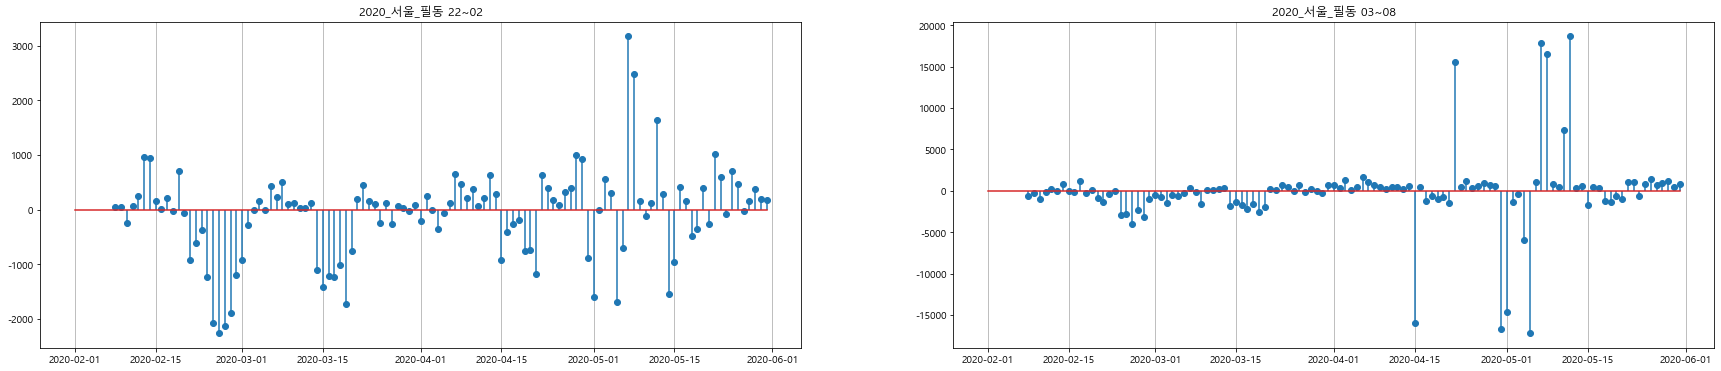

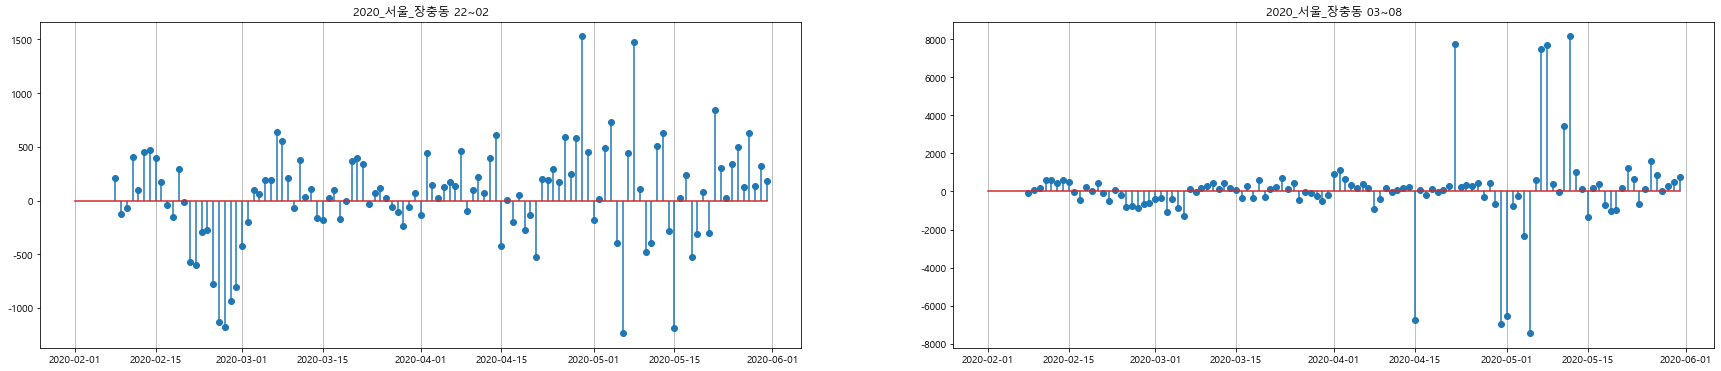

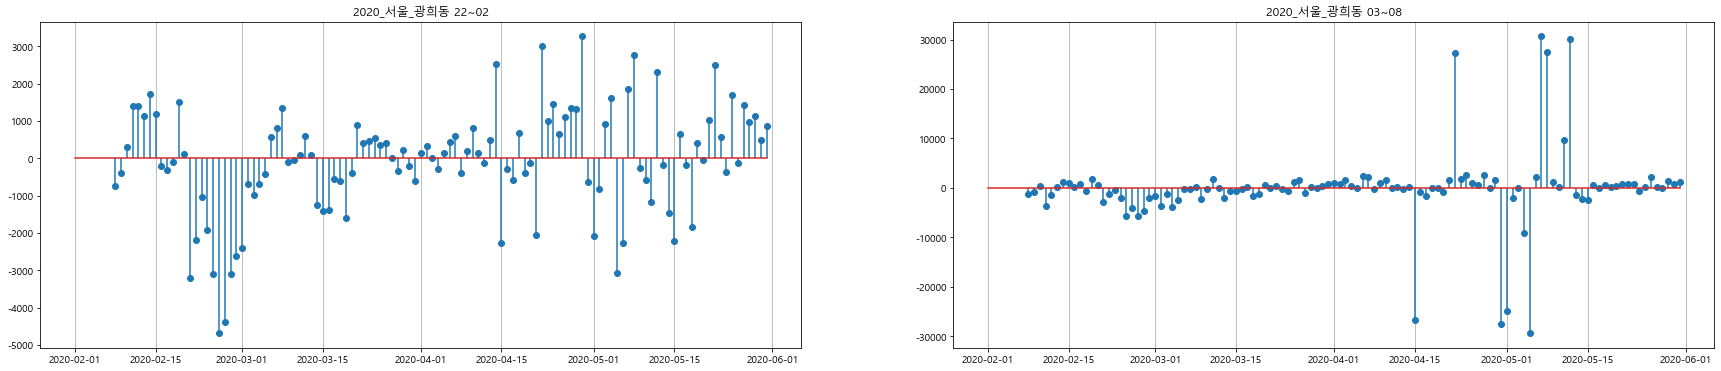

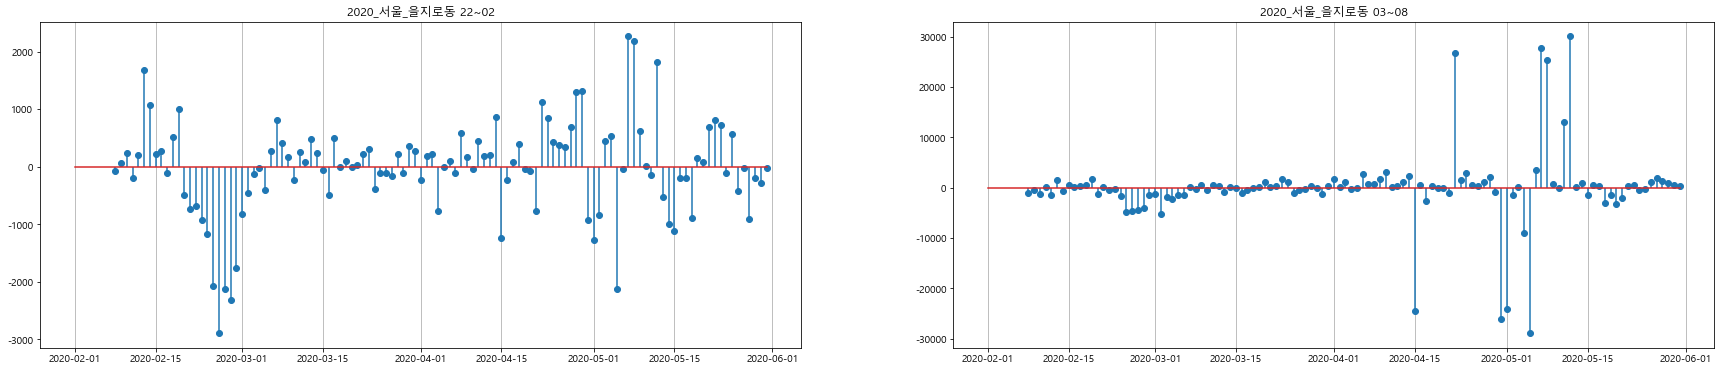

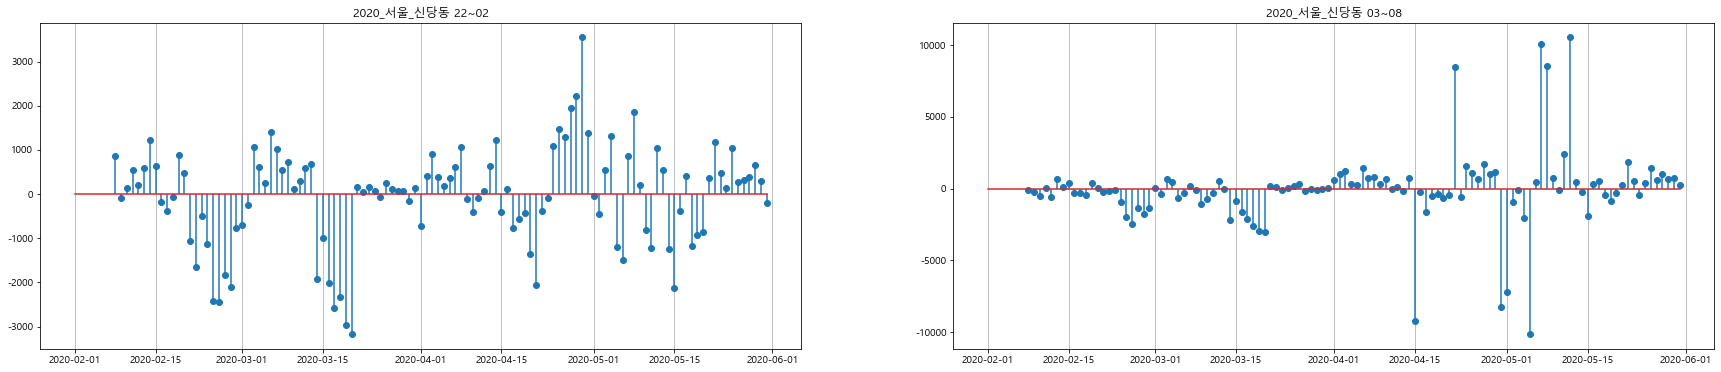

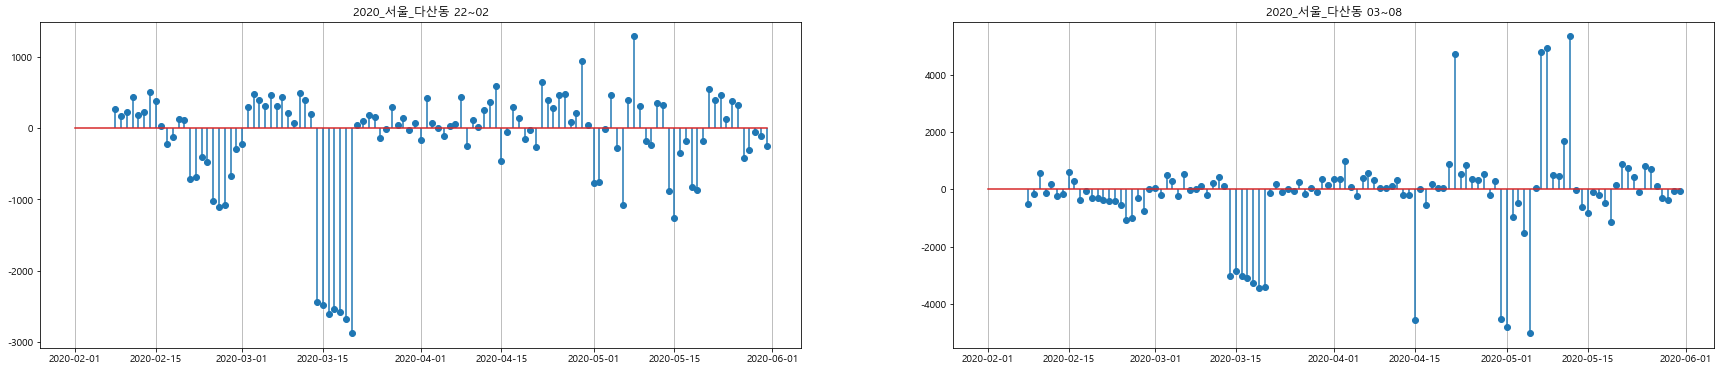

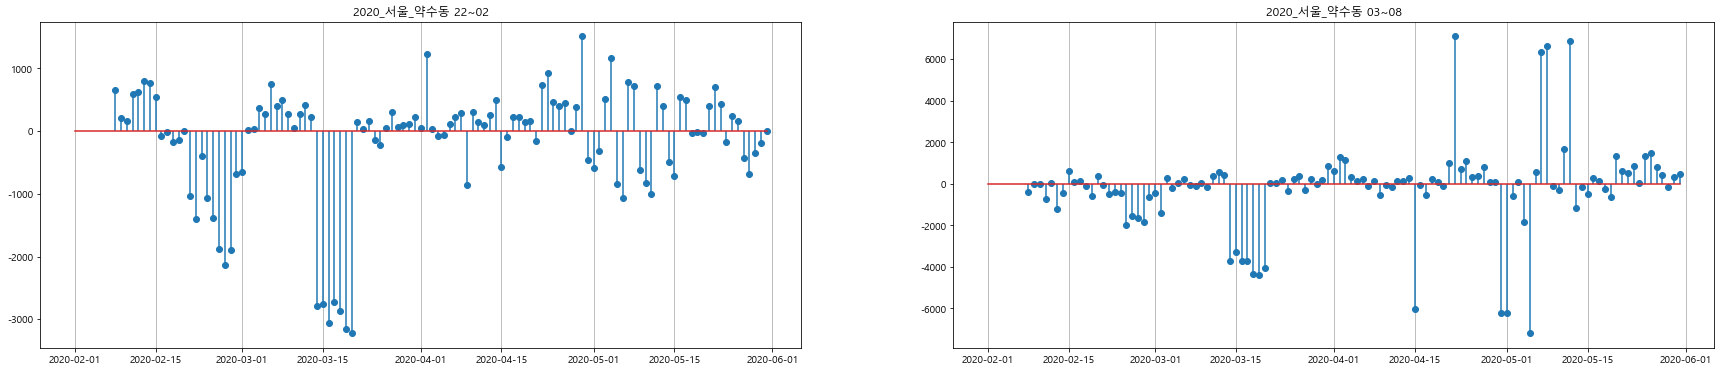

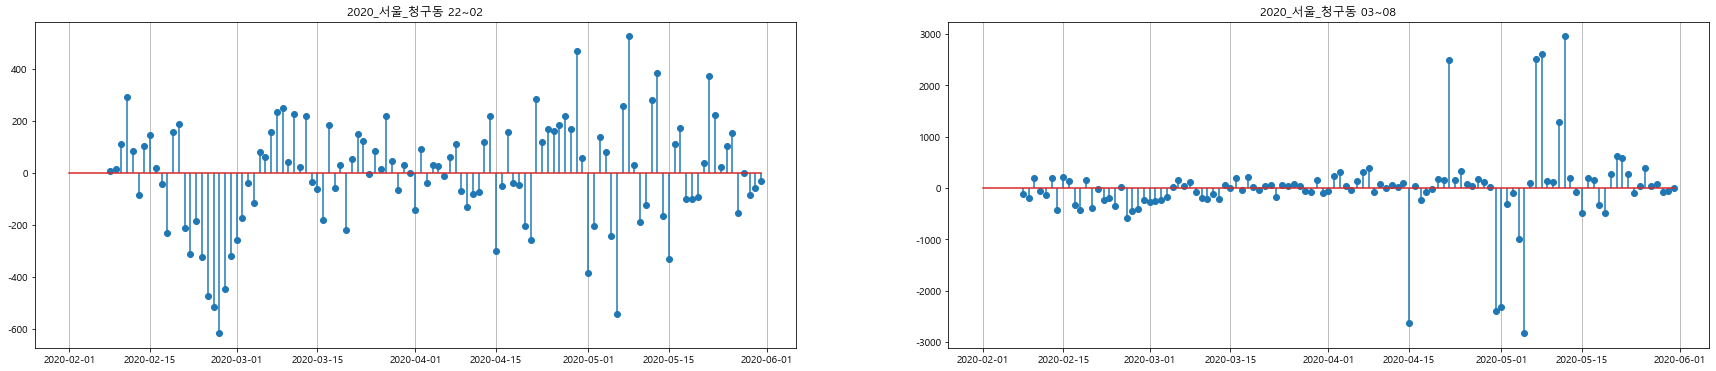

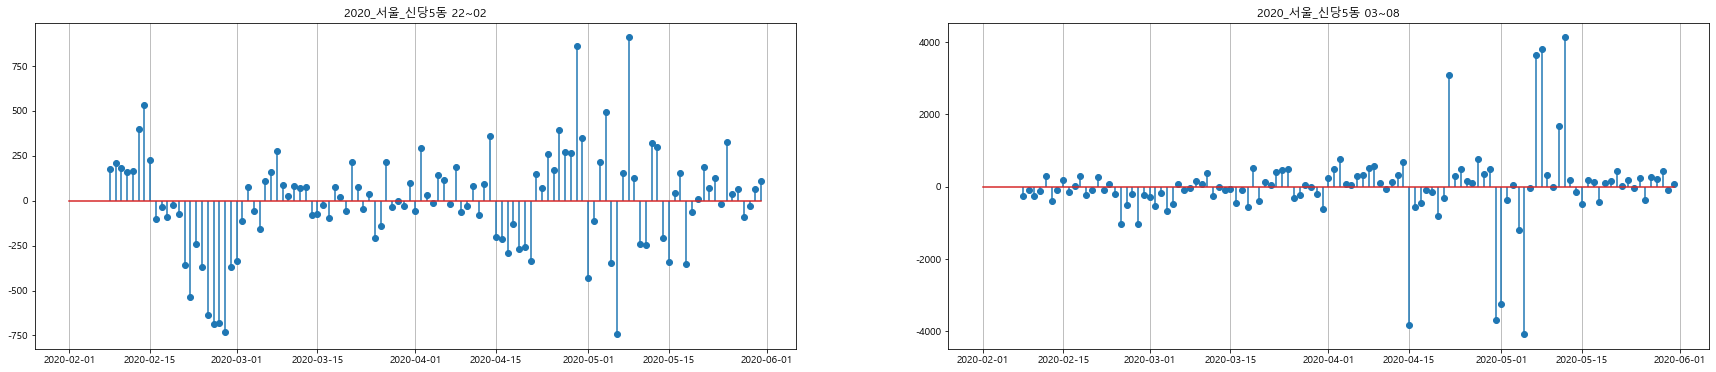

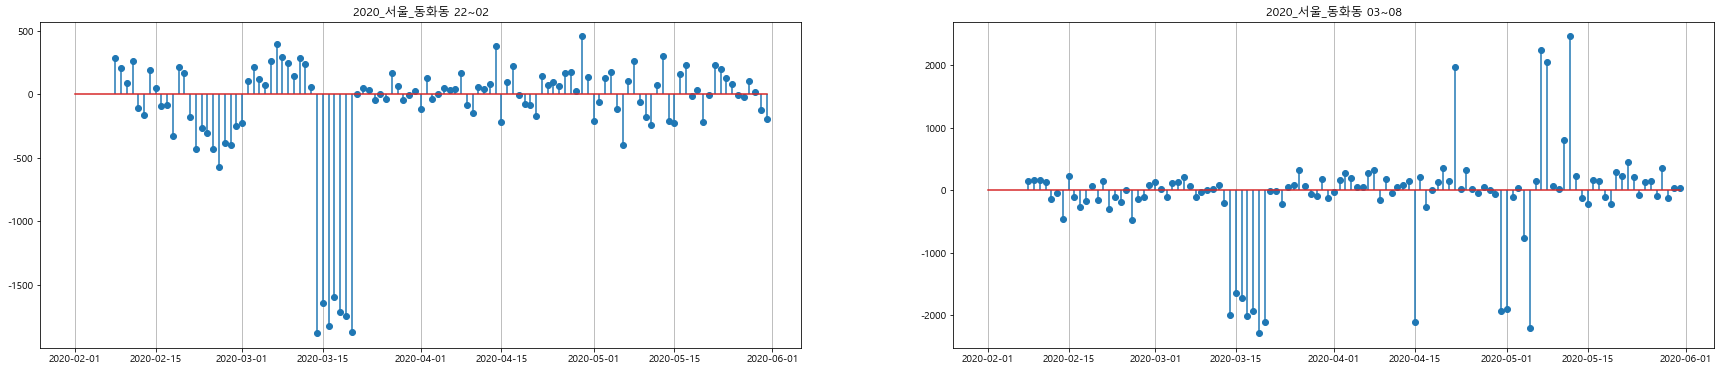

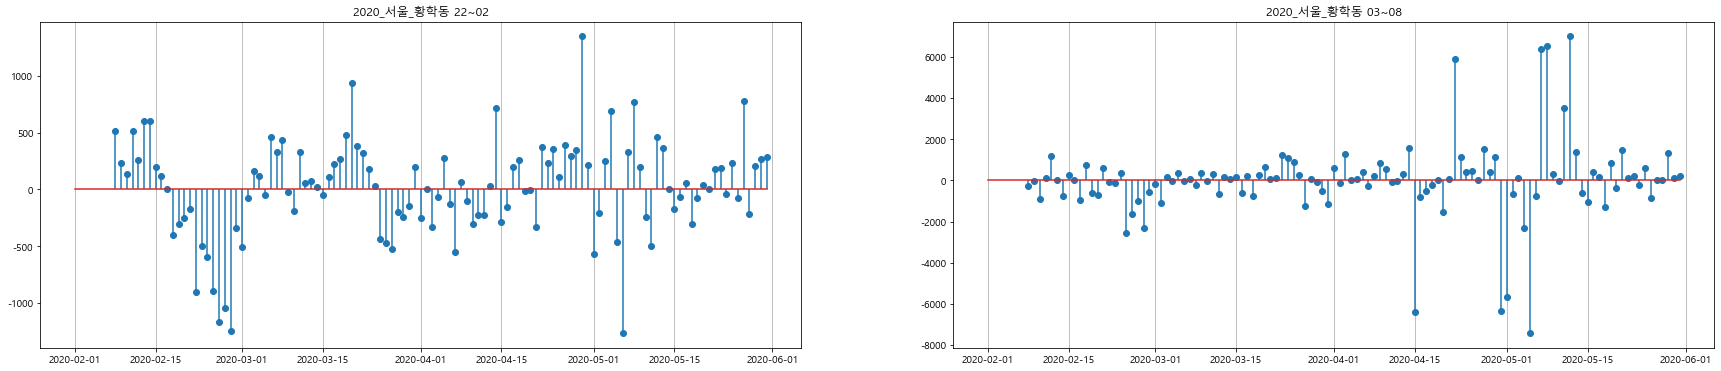

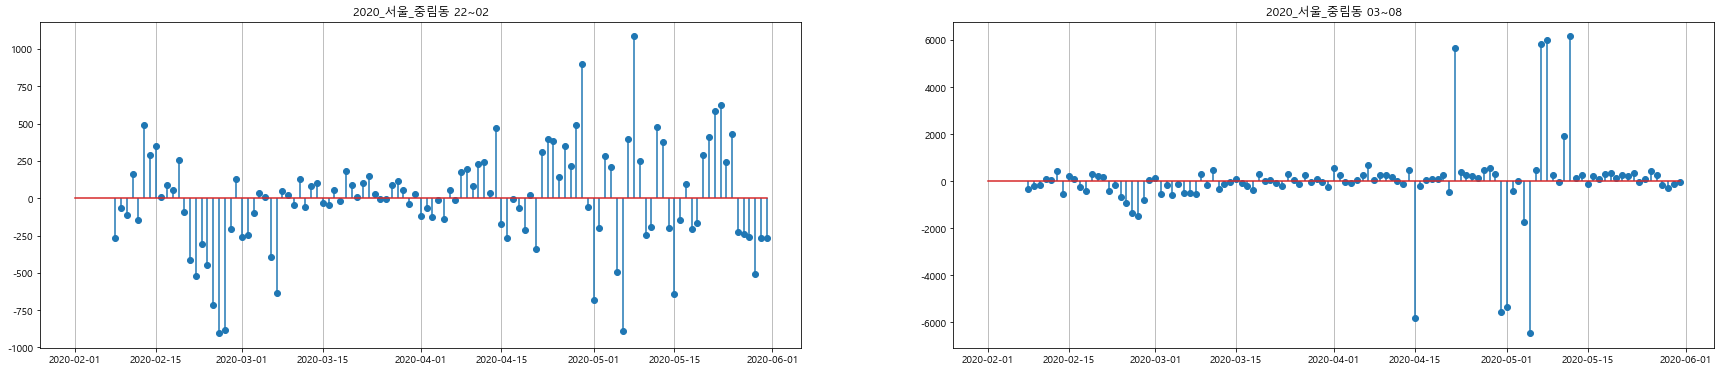

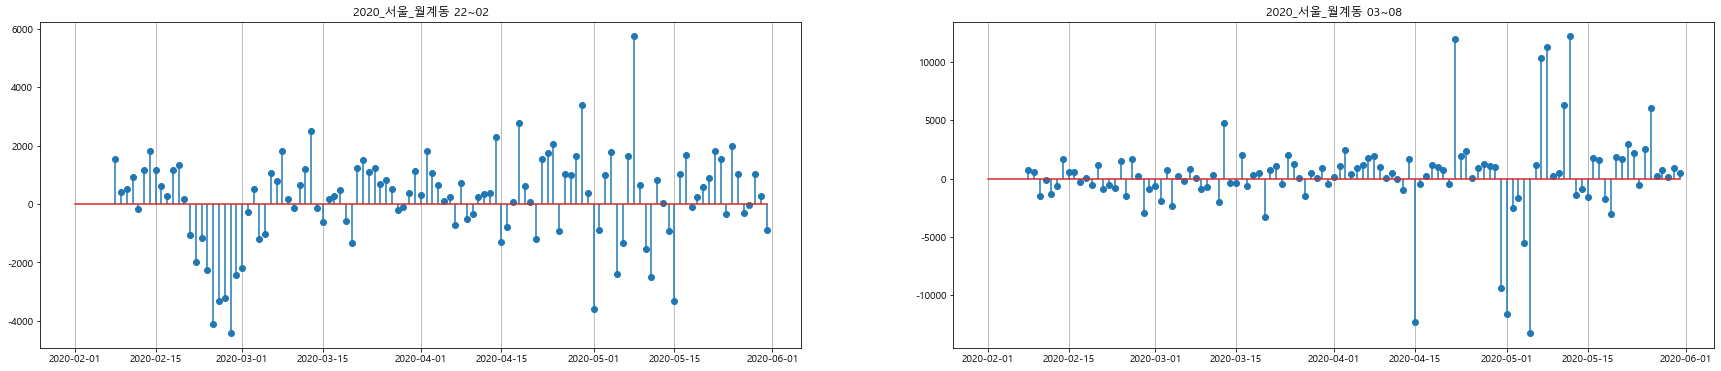

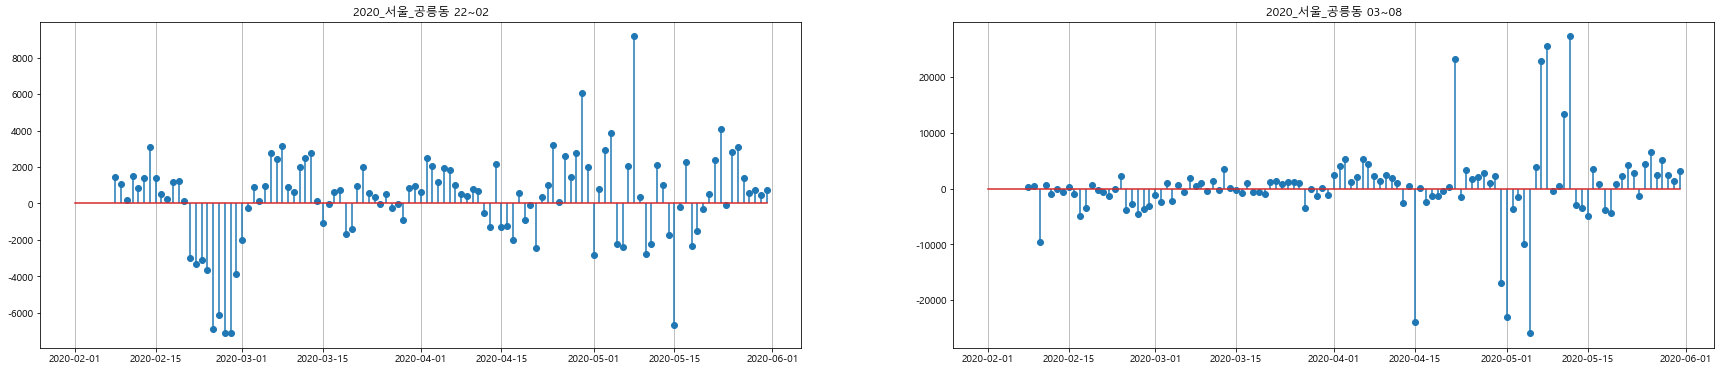

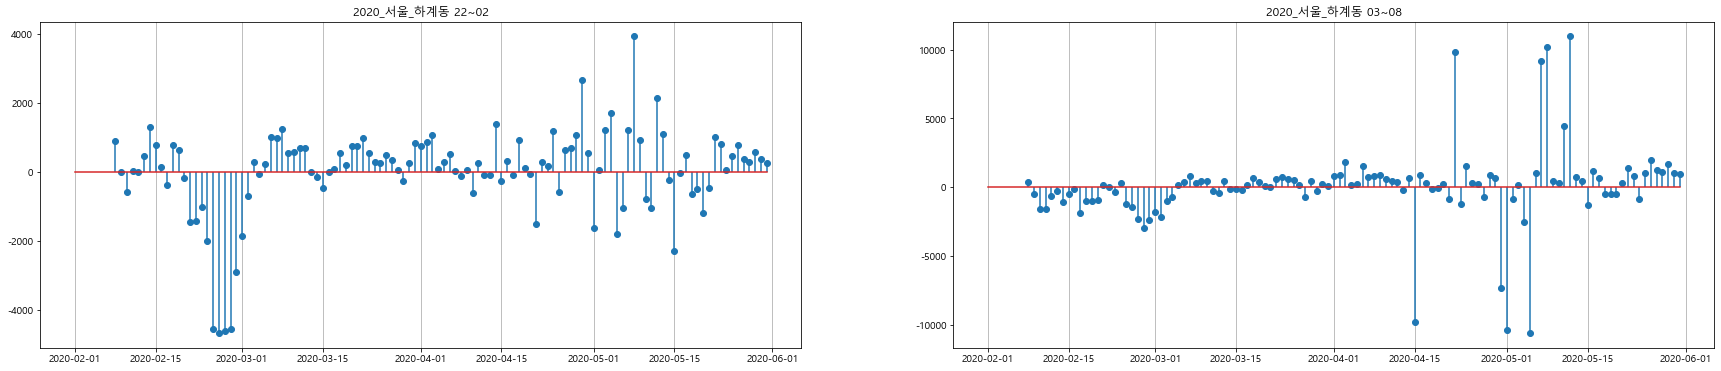

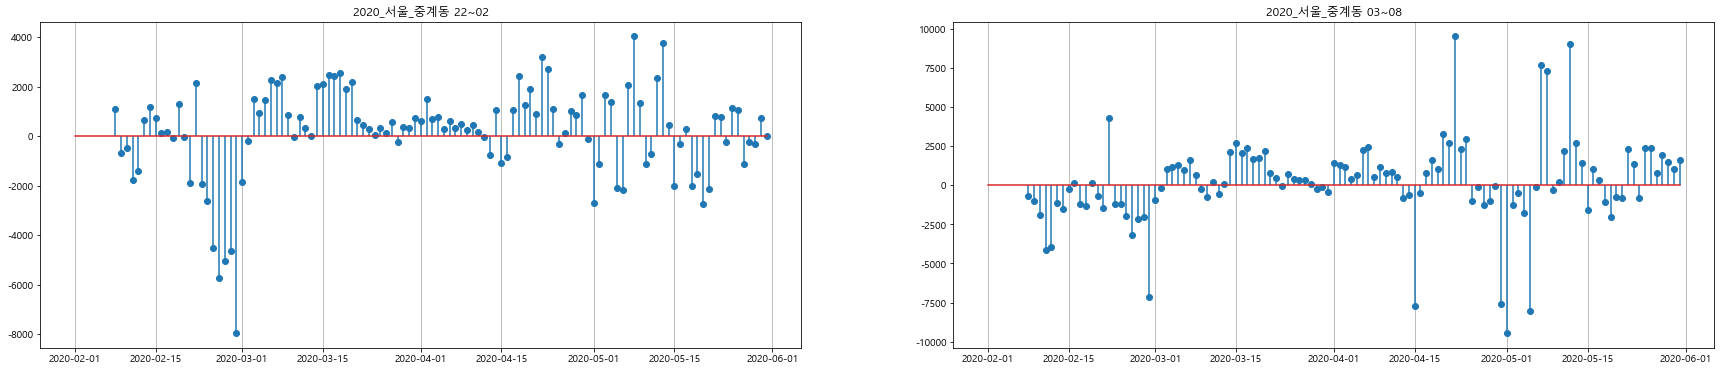

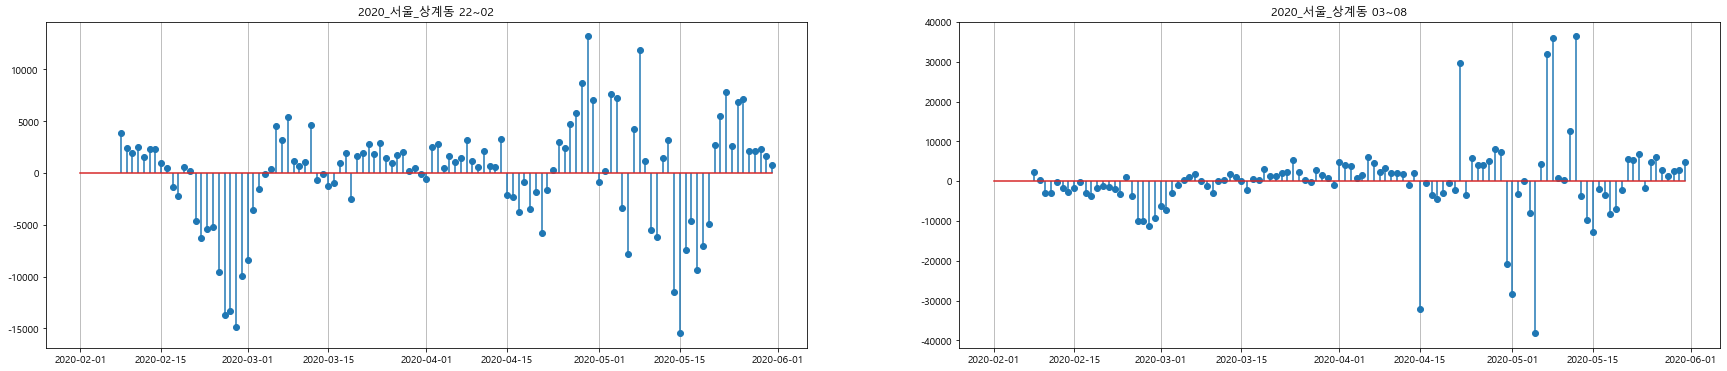

In [40]:
processing_plot(sk_2020_s,'2020_서울_')

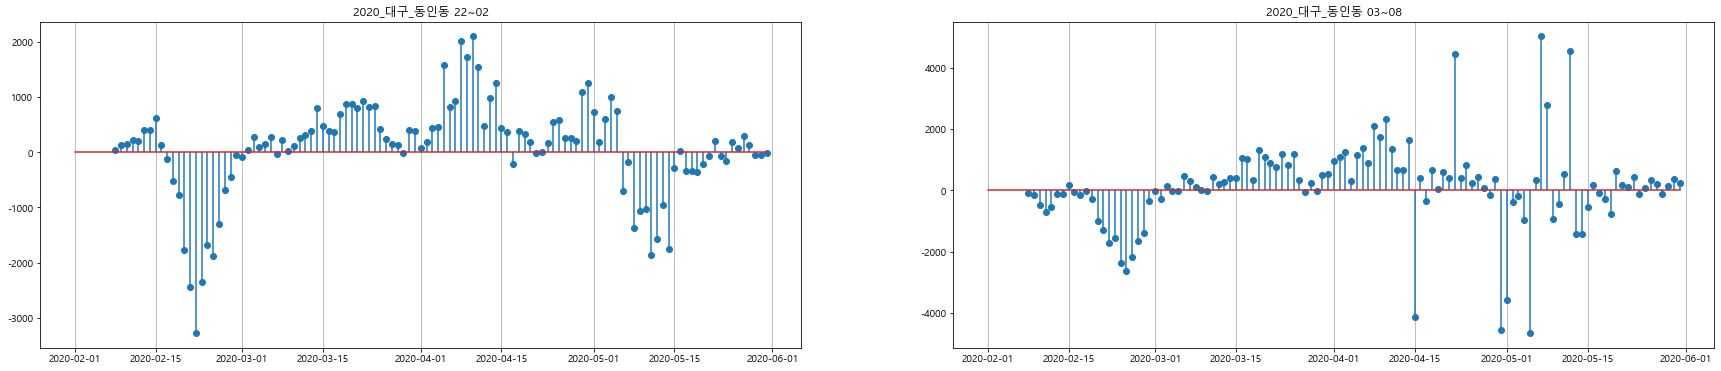

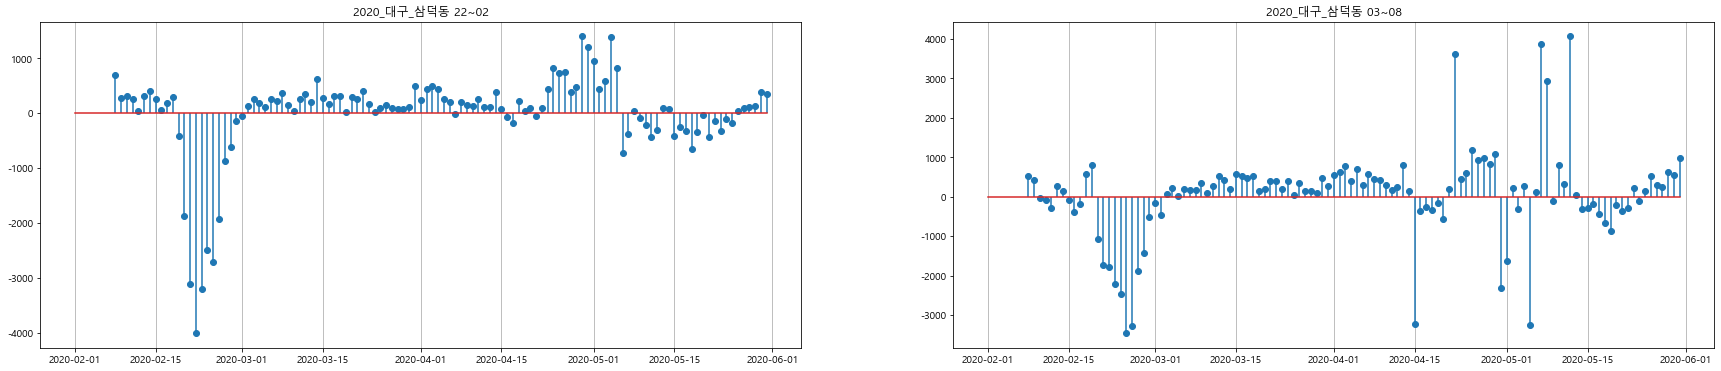

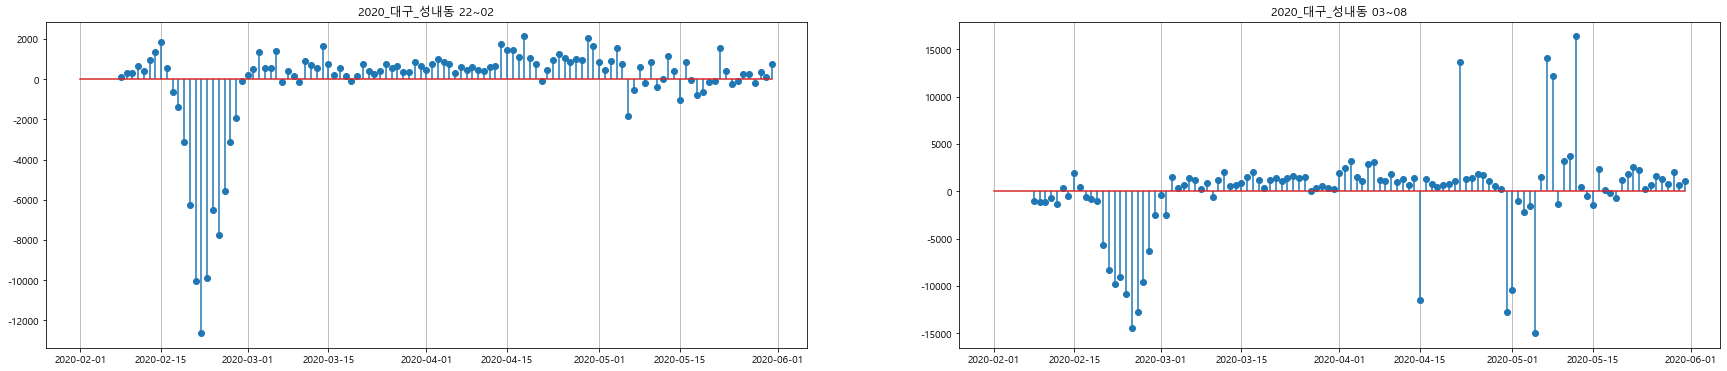

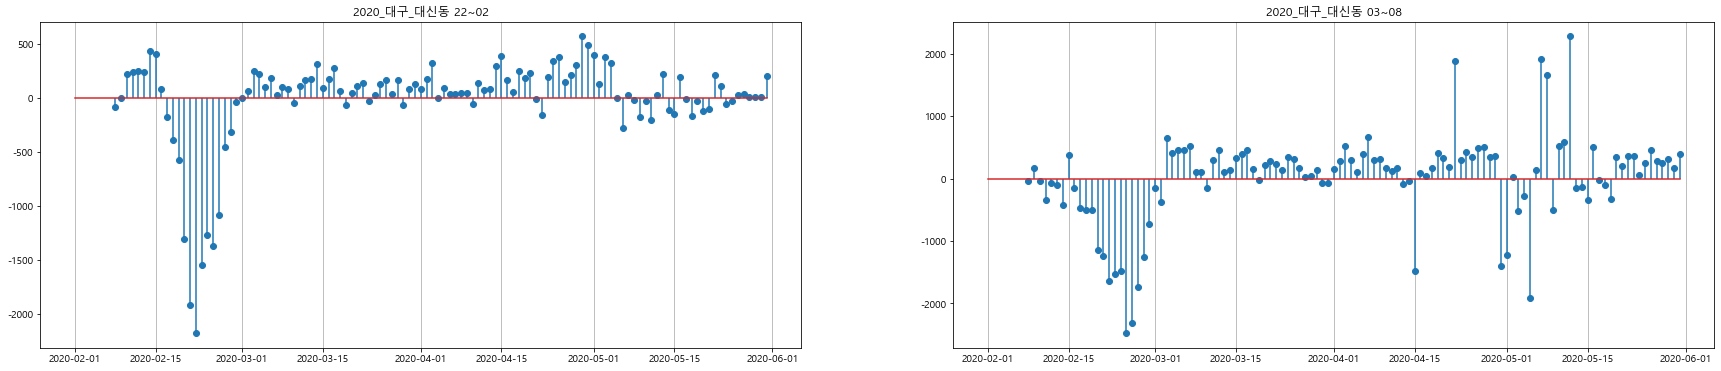

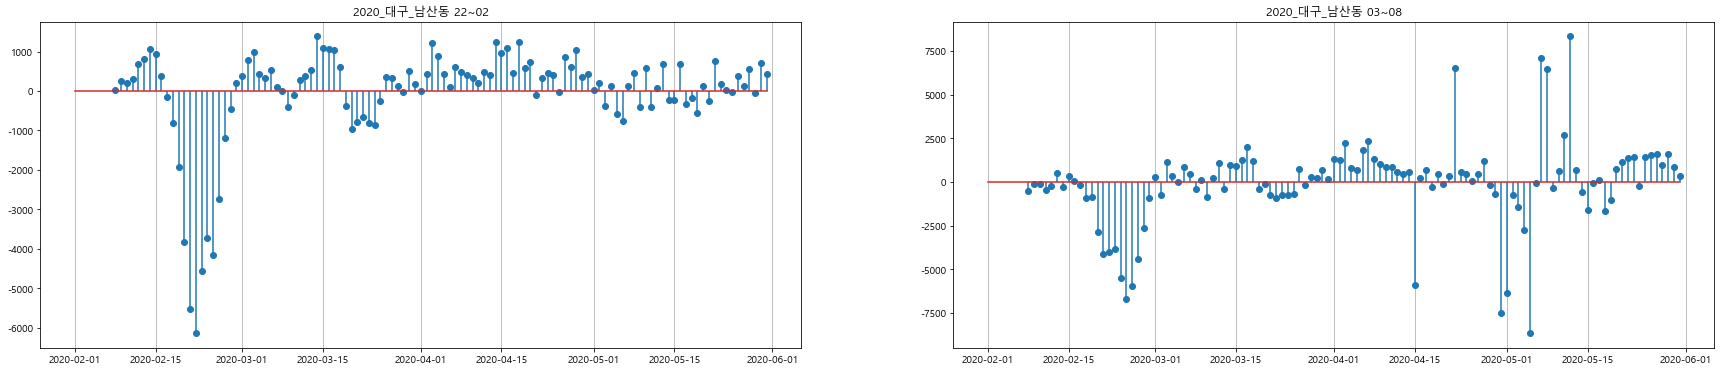

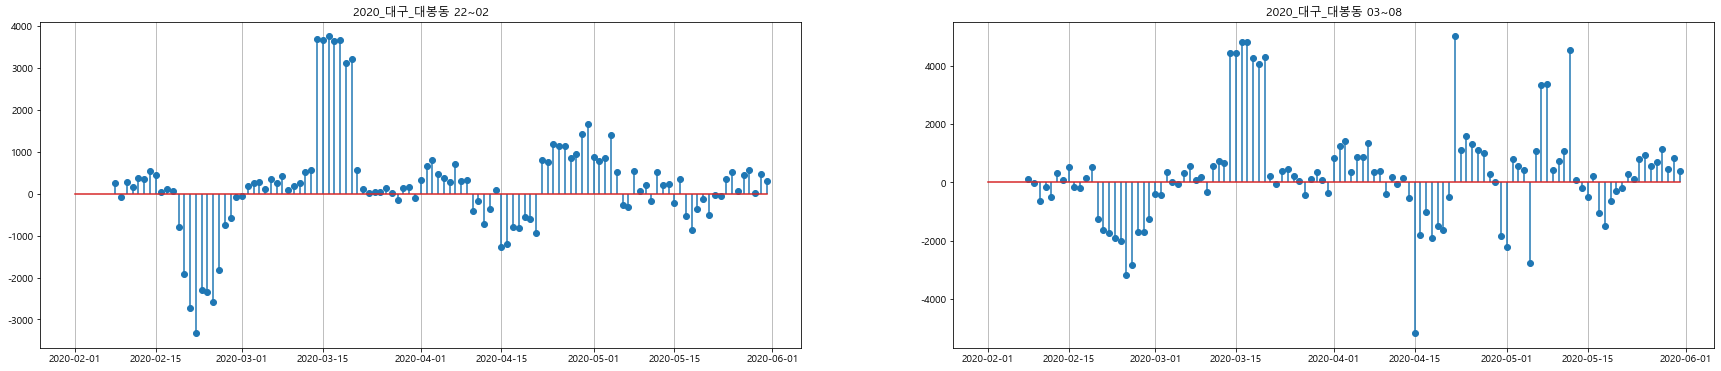

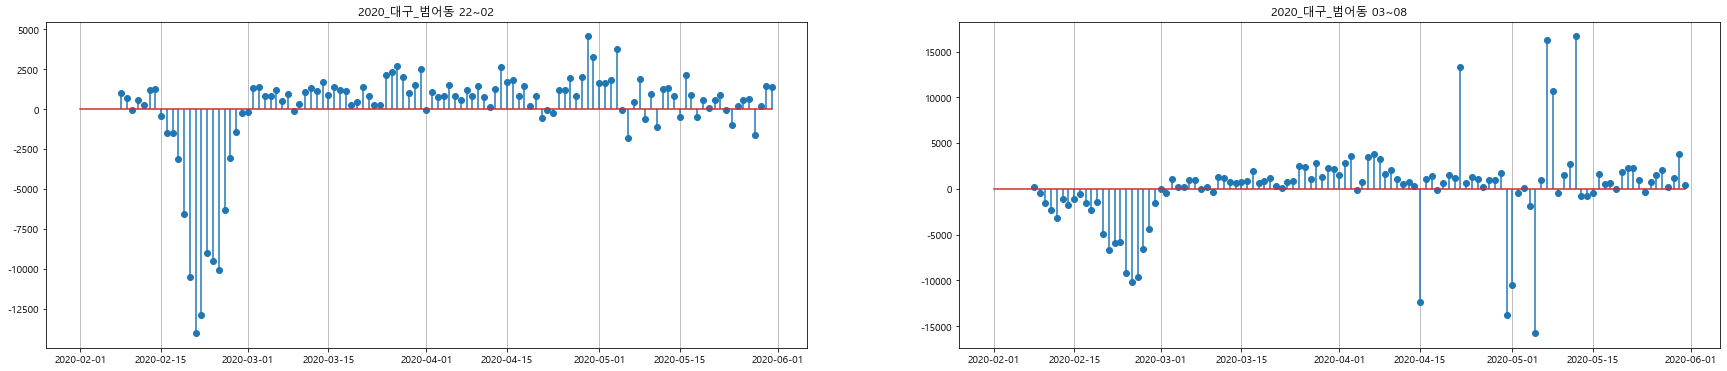

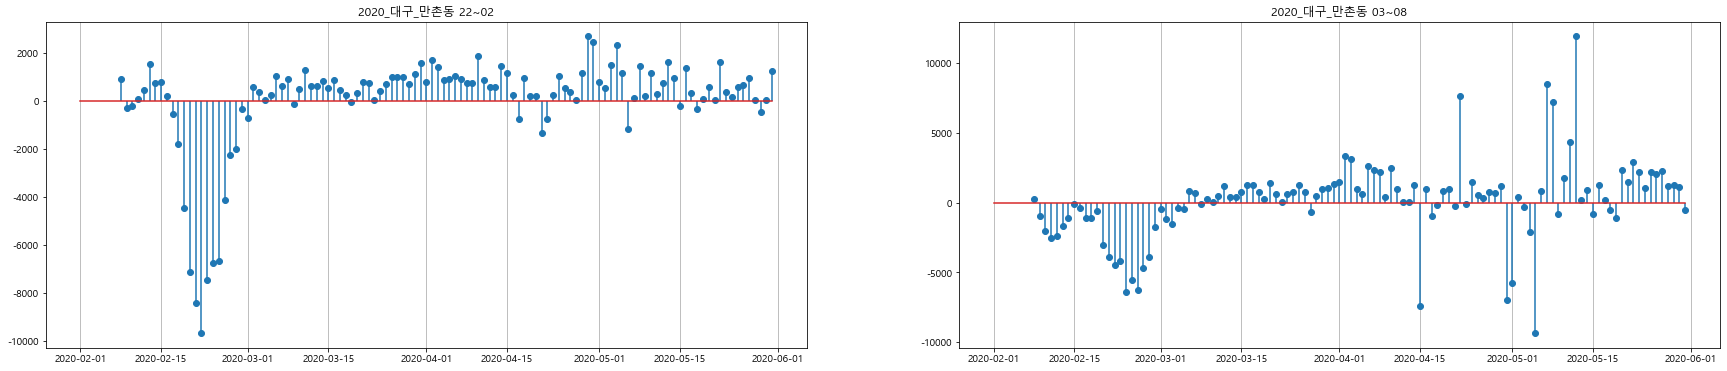

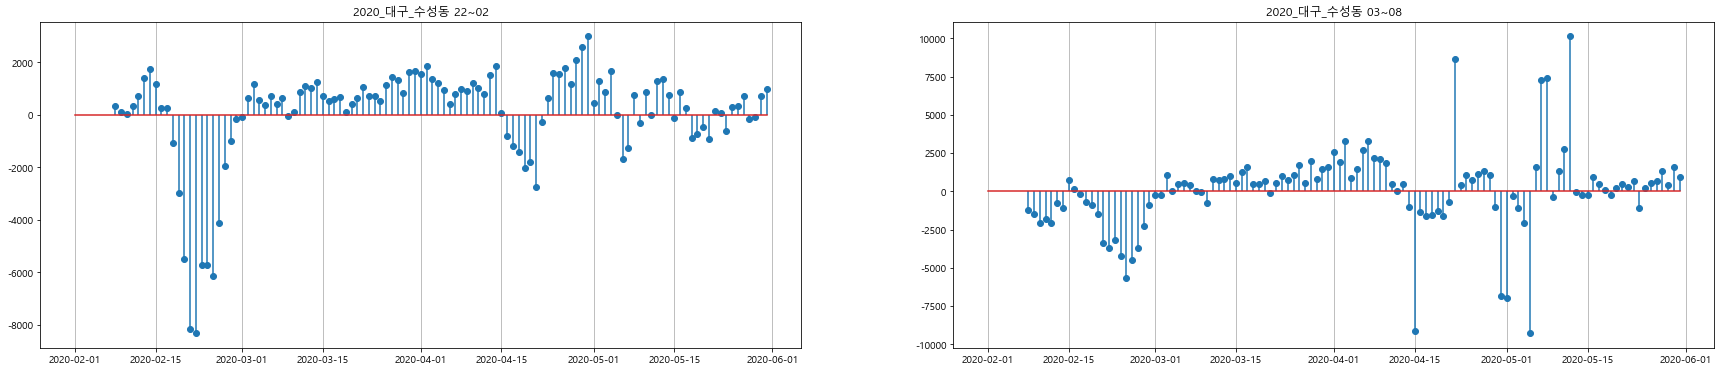

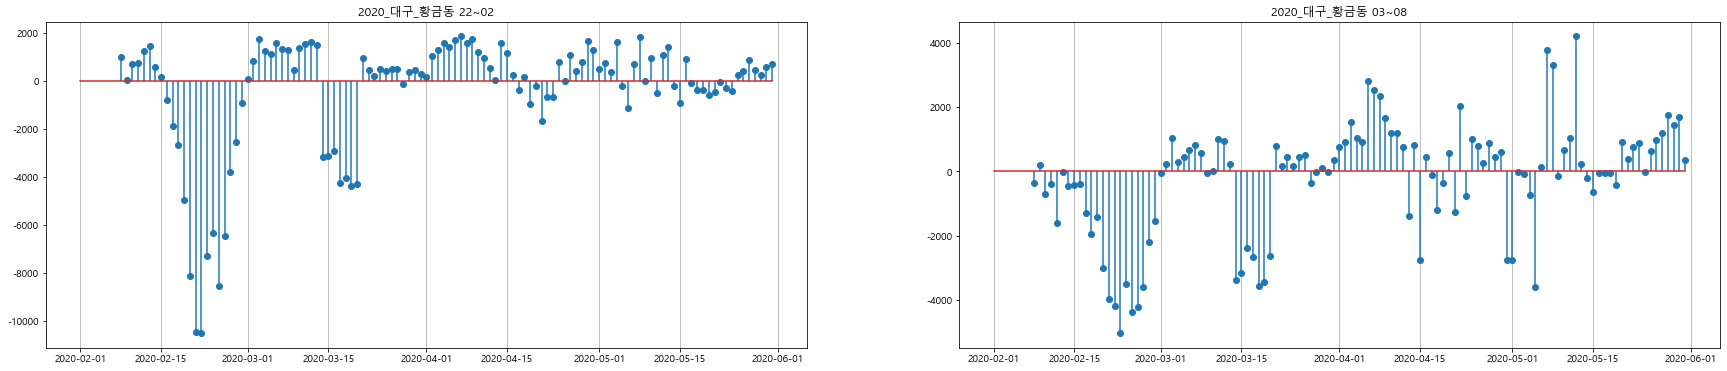

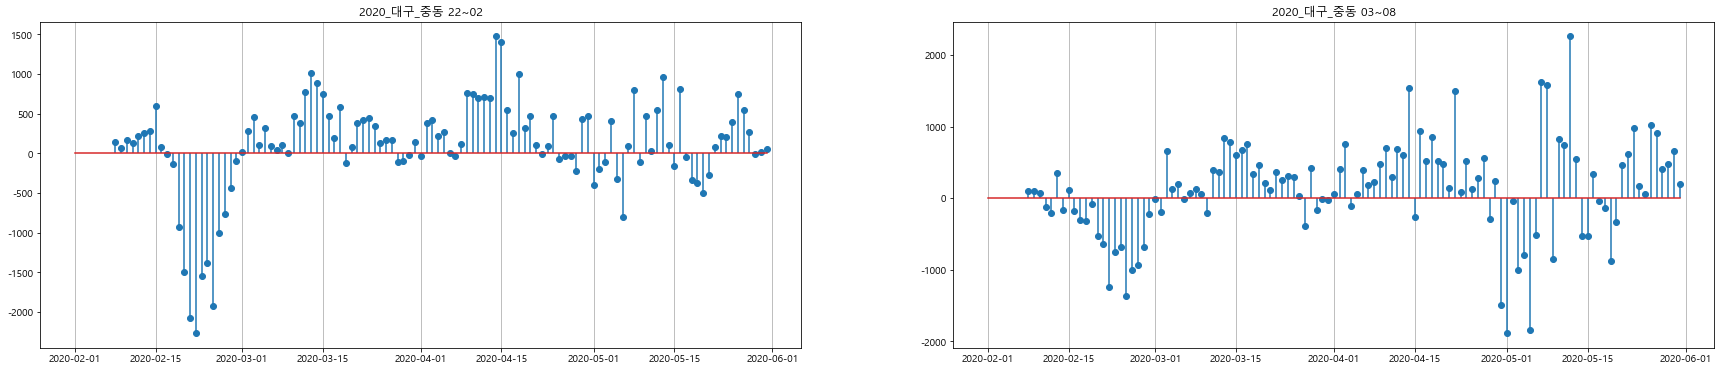

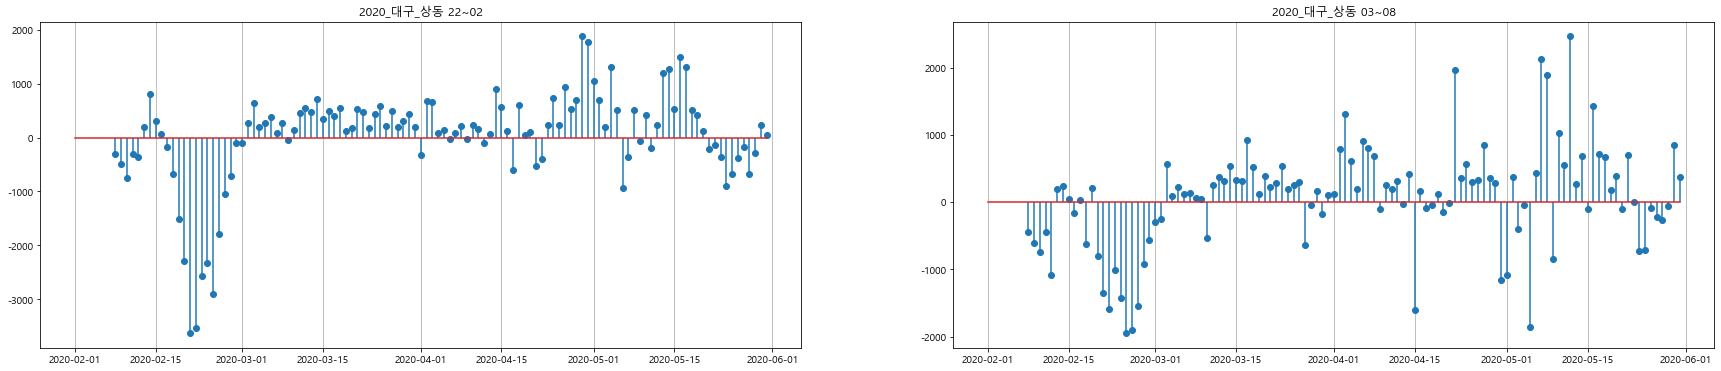

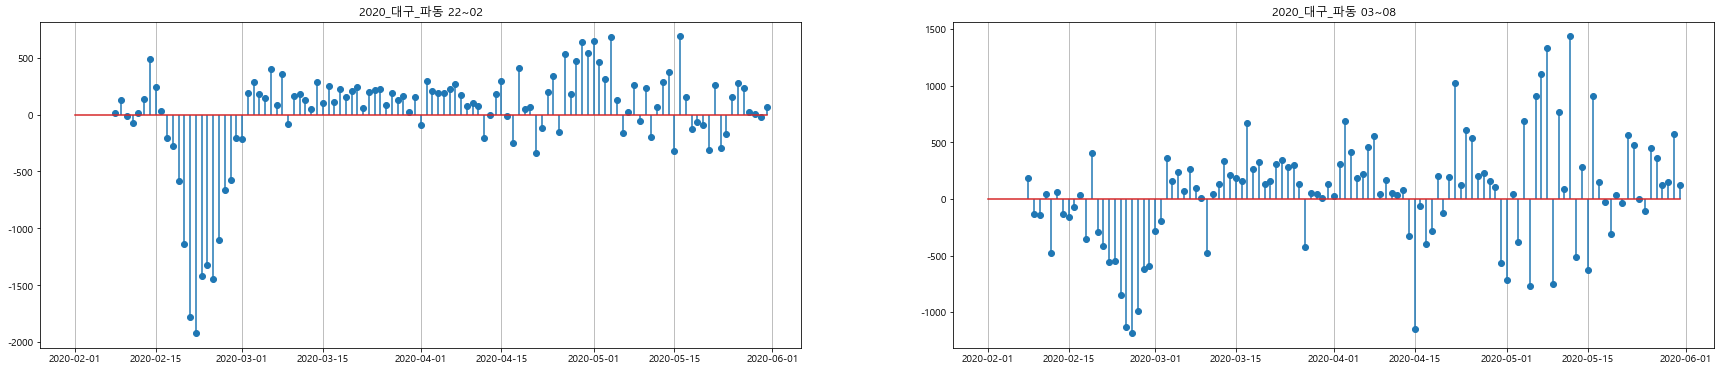

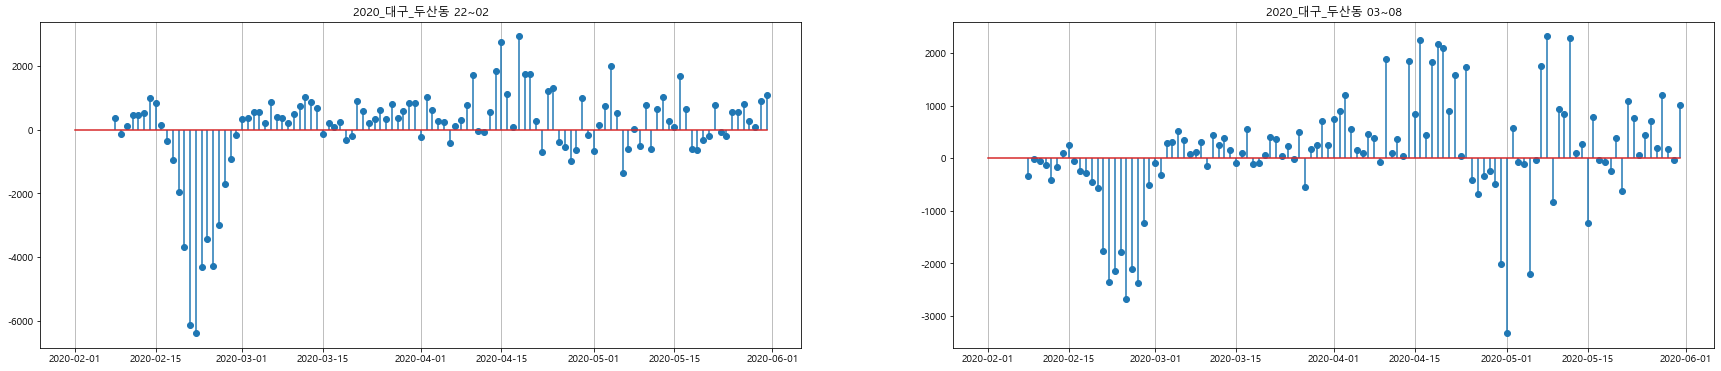

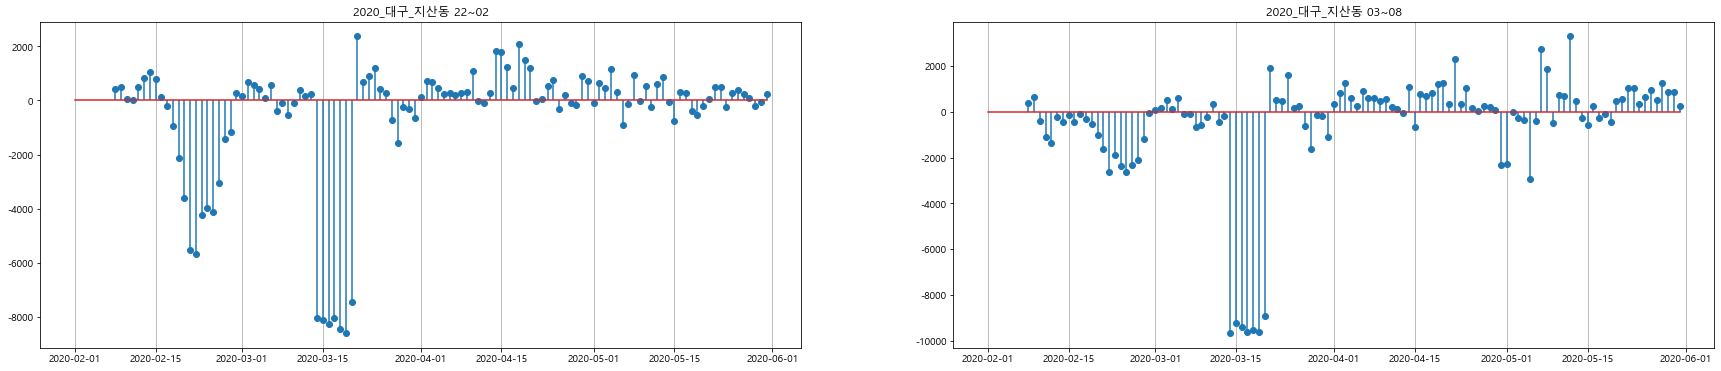

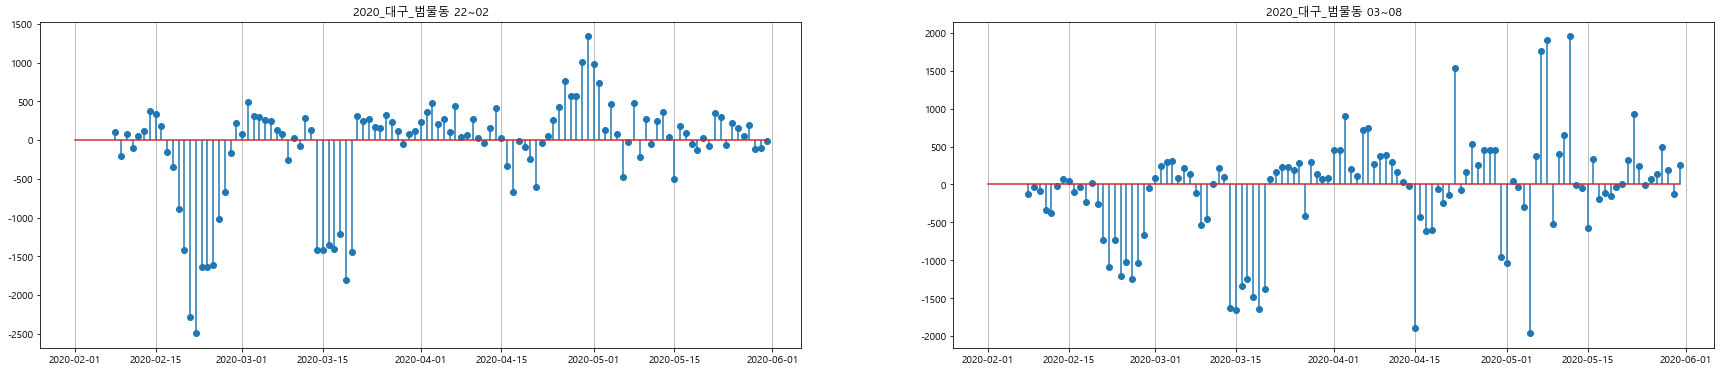

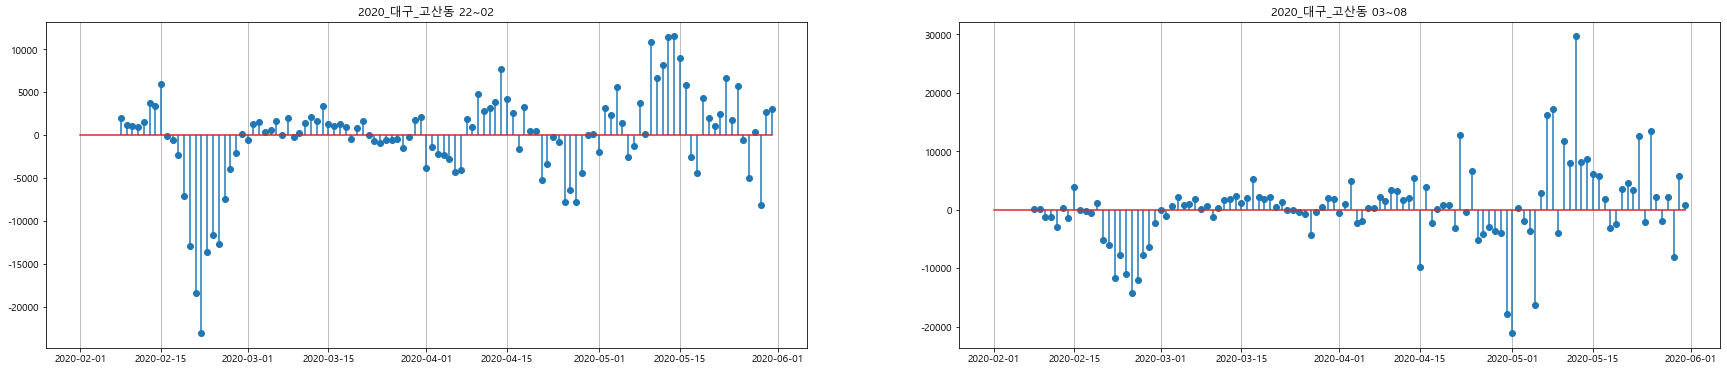

In [41]:
processing_plot(sk_2020_d,'2020_대구_')